In [1]:
import numpy as np
from astropy.io import fits
import lime 
import matplotlib.pyplot as plt

In [2]:
hdul4 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_1D_f99.fits', mode='update')
header4 = hdul4[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header4['FLUXSCAL'] = 1
header4
    
hdul4.flush()

In [3]:
print(header4)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2245 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:34:44' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:34:44' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4024.07153320312 / RA at R

In [4]:
def import_1313_fits(file_address, ext=0):
    
    #open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header
        
    #reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header["CRVAL1"], header["CD1_1"], header["NAXIS1"]
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)
    
    return wavelength, data, header

In [5]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file4 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit4_1D_f99.fits'

#load the data
wave4, flux4, hdr4 = import_1313_fits(fits_file4)

In [6]:
# Galaxy redshift and the flux normalization
z_obj = 0.001568
normFlux = 1

In [7]:
spec4 = lime.Spectrum(wave4, flux4, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

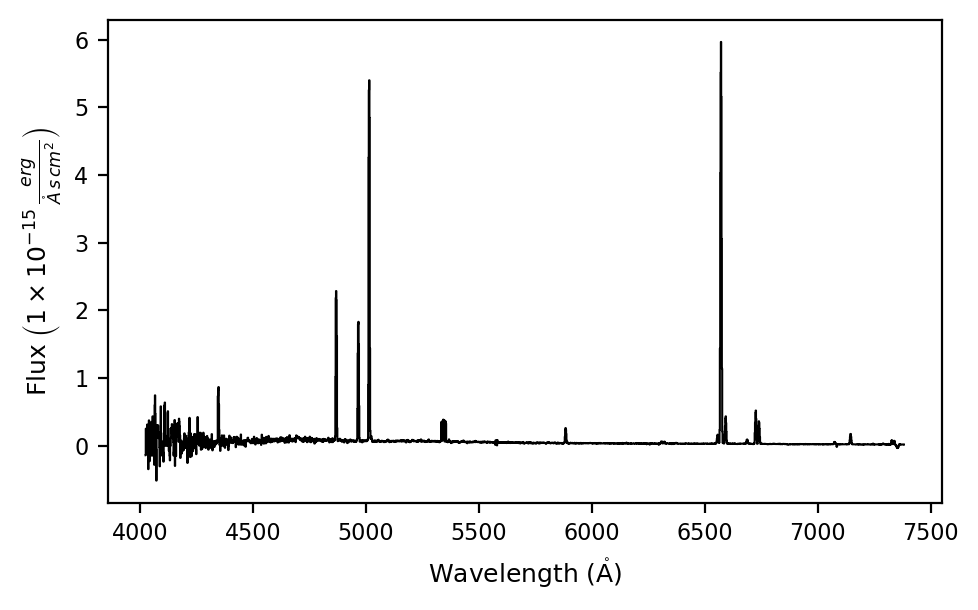

In [8]:
spec4.plot.spectrum(label='NGC1313')

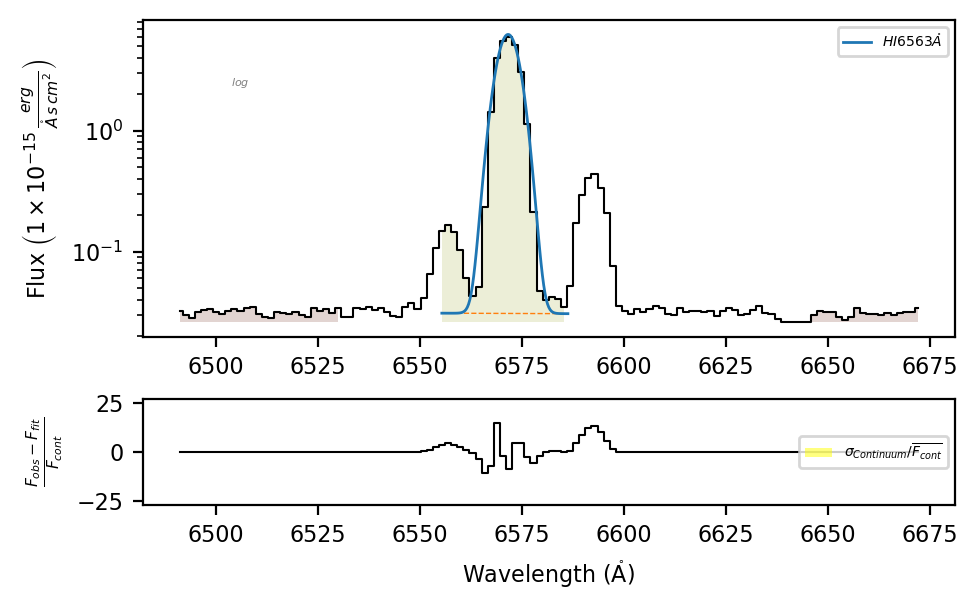

In [9]:
spec4.fit.bands(6563)
spec4.plot.bands()

In [10]:
# Line name and its location mask in the rest _frame
line4 = 'H1_6563A'
band_edges4 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

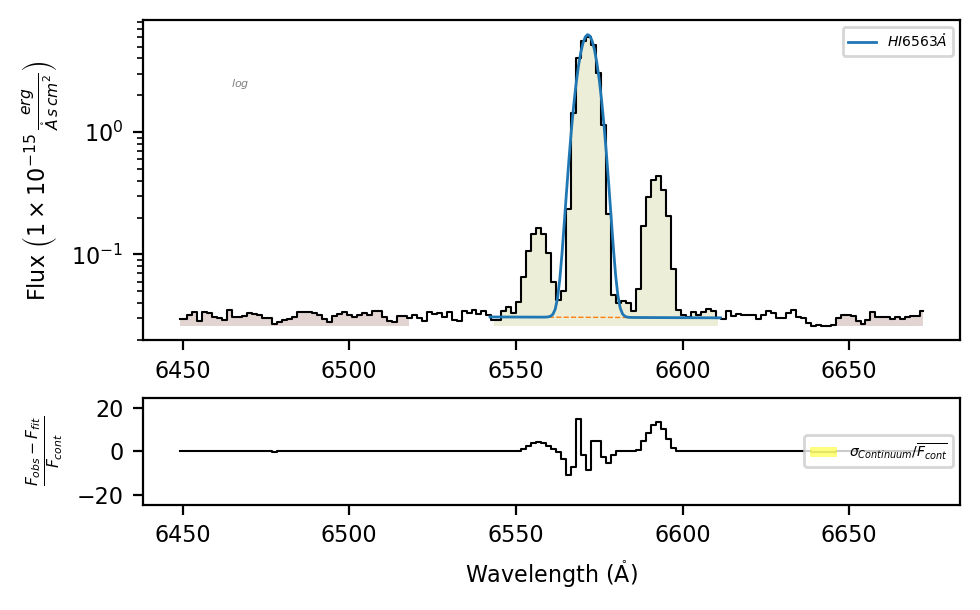

In [11]:
# Run the fitting and plot it
spec4.fit.bands(line4, band_edges4)
spec4.plot.bands()

In [12]:
# Fit configuration
line4 = 'H1_6563A_b'
fit_conf4 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

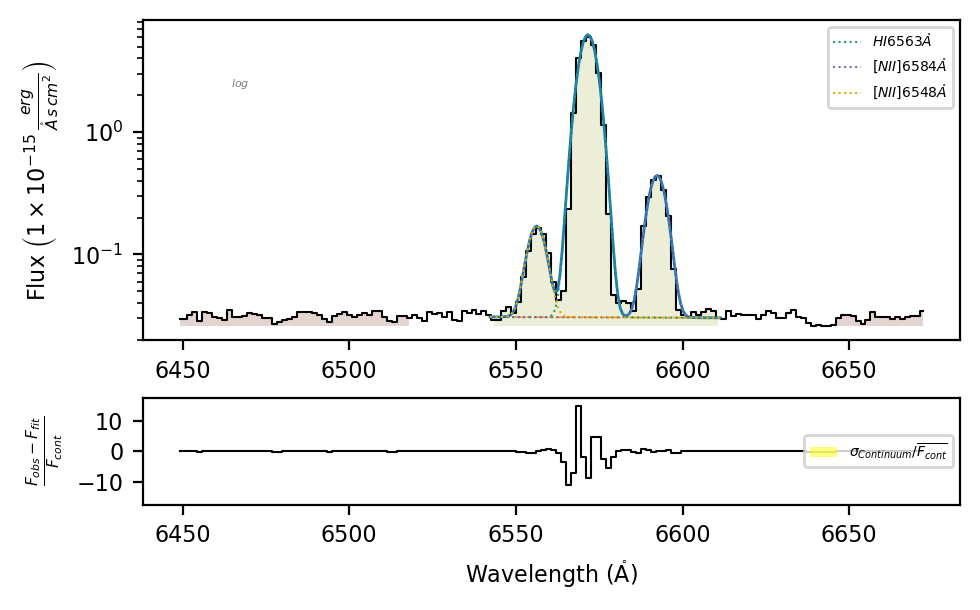

In [13]:
# New attempt including the fit configuration
spec4.fit.bands(line4, band_edges4, fit_conf=fit_conf4)
spec4.plot.bands()

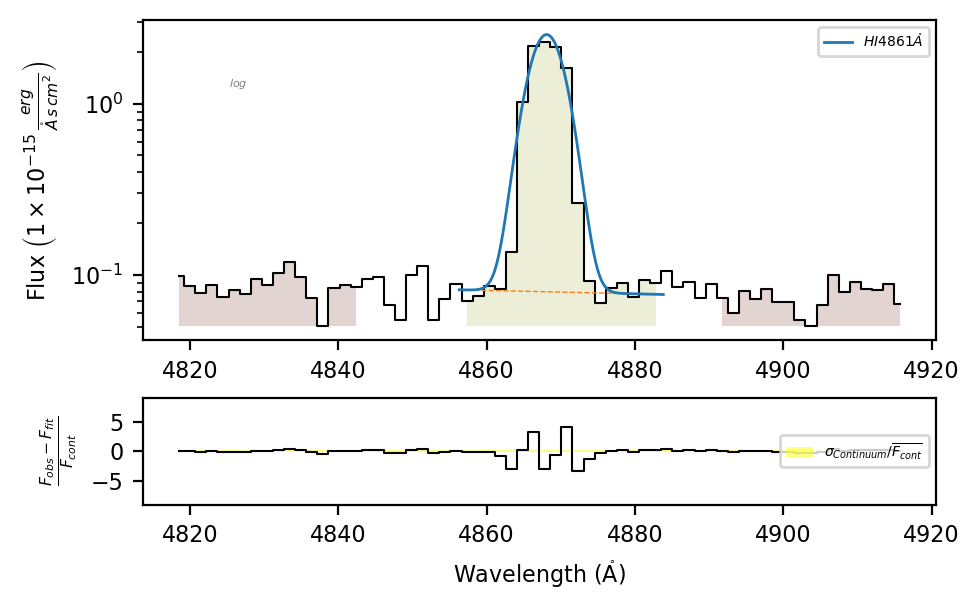

In [14]:
spec4.fit.bands(4861)
spec4.plot.bands()

In [15]:
spec4.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x133c9d160>>

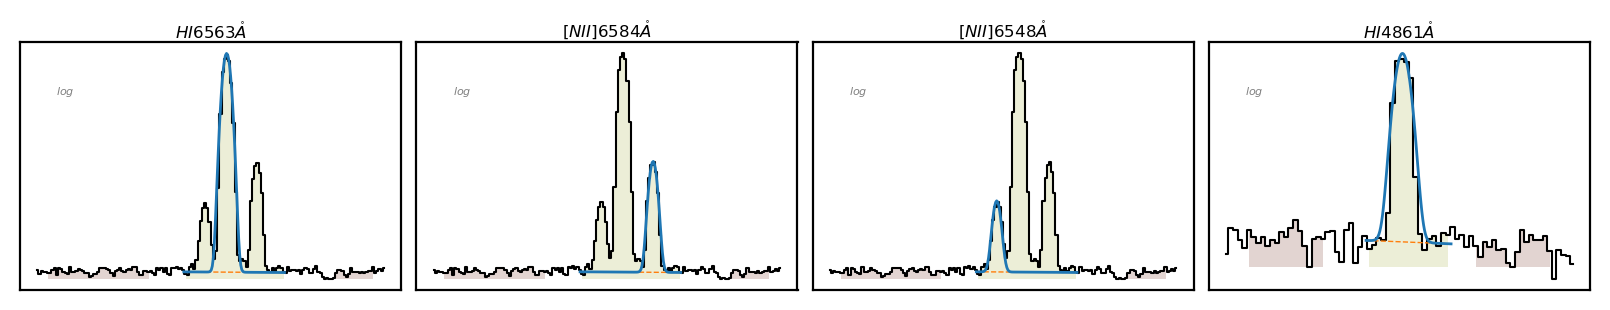

In [16]:
spec4.plot.grid()

In [17]:
spec4.save_frame('slit4_Hae_Hb_f99.txt')

SLIT 8

In [18]:
hdul8 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99.fits', mode='update')
header8 = hdul8[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header8['FLUXSCAL'] = 1
header8
hdul8.flush()

In [19]:
print(header8)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2382 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:34:59' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:34:59' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4028.45336914063 / RA at R

In [20]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file8 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_1D_f99.fits'

#load the data
wave8, flux8, hdr8 = import_1313_fits(fits_file8)

In [21]:
spec8 = lime.Spectrum(wave8, flux8, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

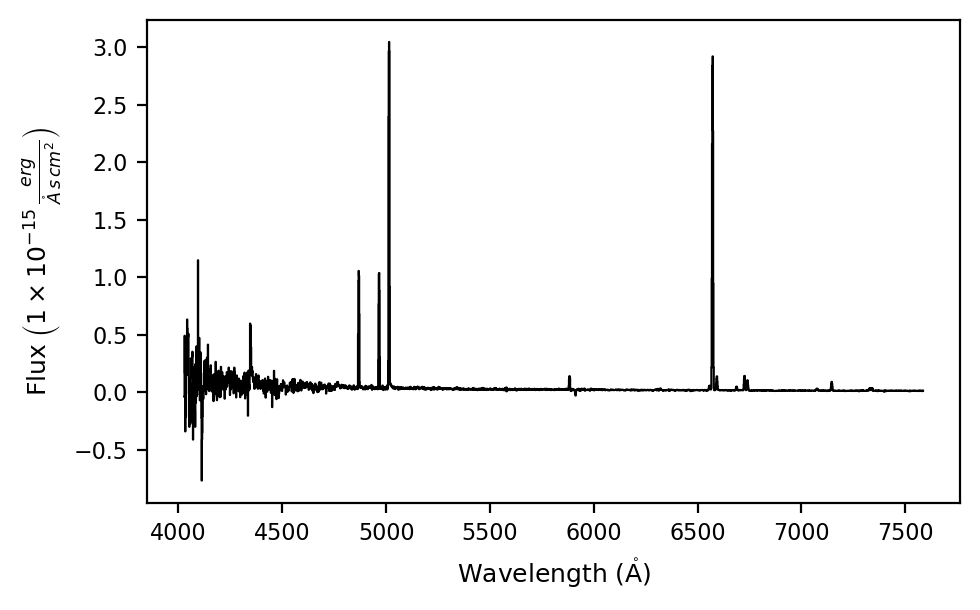

In [22]:
spec8.plot.spectrum(label='NGC1313')

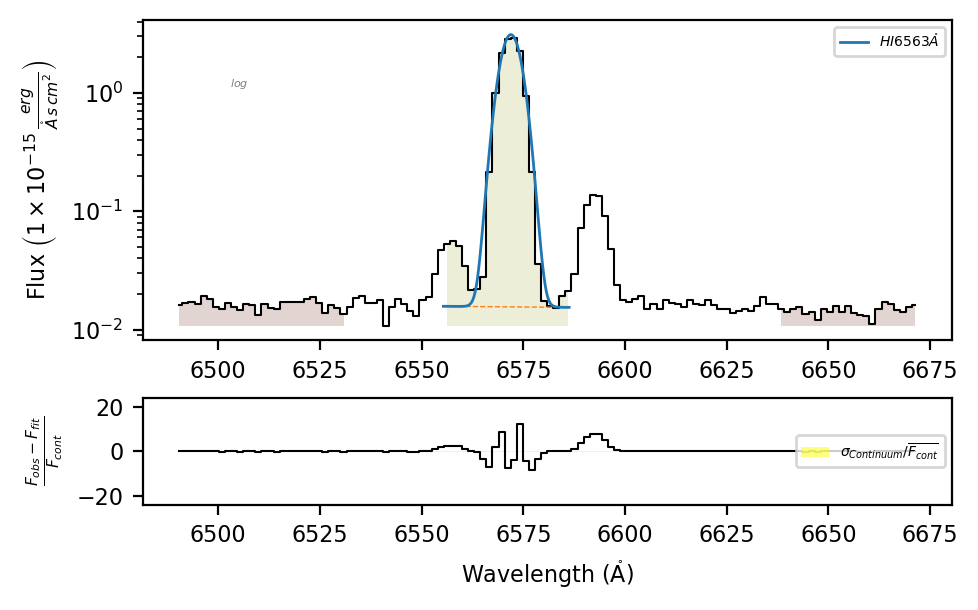

In [23]:
spec8.fit.bands(6563)
spec8.plot.bands()

In [24]:
# Line name and its location mask in the rest _frame
line8 = 'H1_6563A'
band_edges8 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

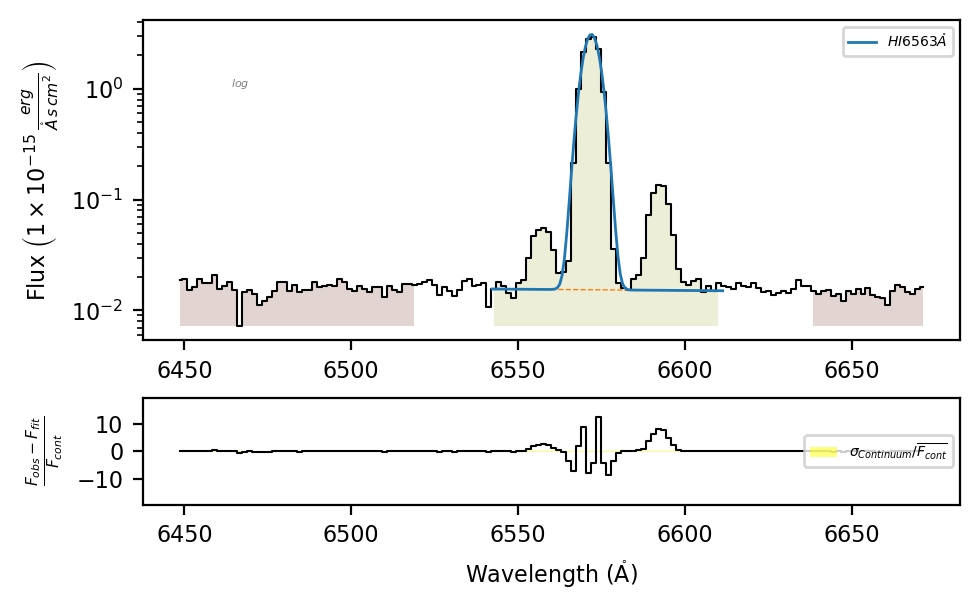

In [25]:
# Run the fitting and plot it
spec8.fit.bands(line8, band_edges8)
spec8.plot.bands()

In [26]:
# Fit configuration
line8 = 'H1_6563A_b'
fit_conf8 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

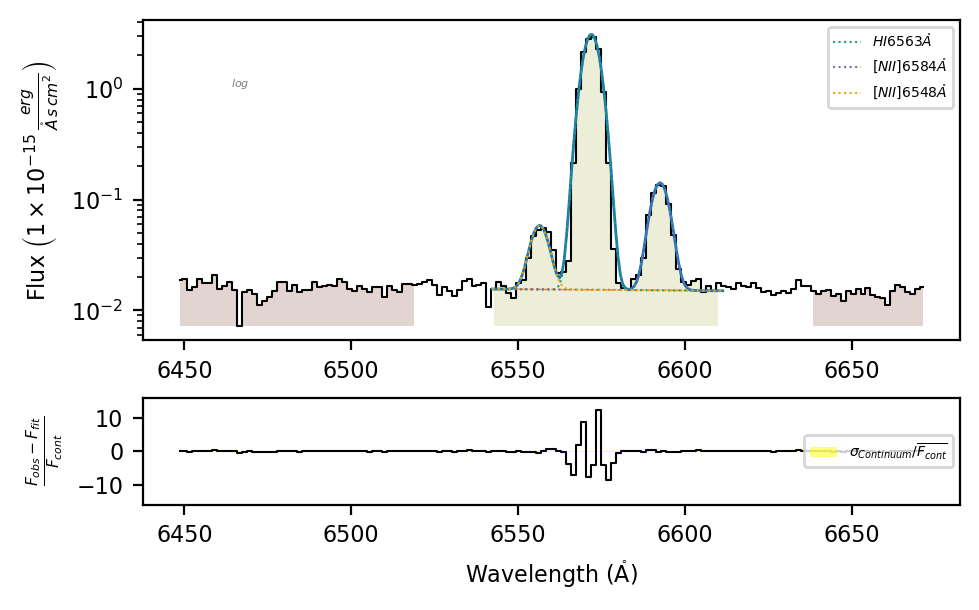

In [27]:
# New attempt including the fit configuration
spec8.fit.bands(line8, band_edges8, fit_conf=fit_conf8)
spec8.plot.bands()

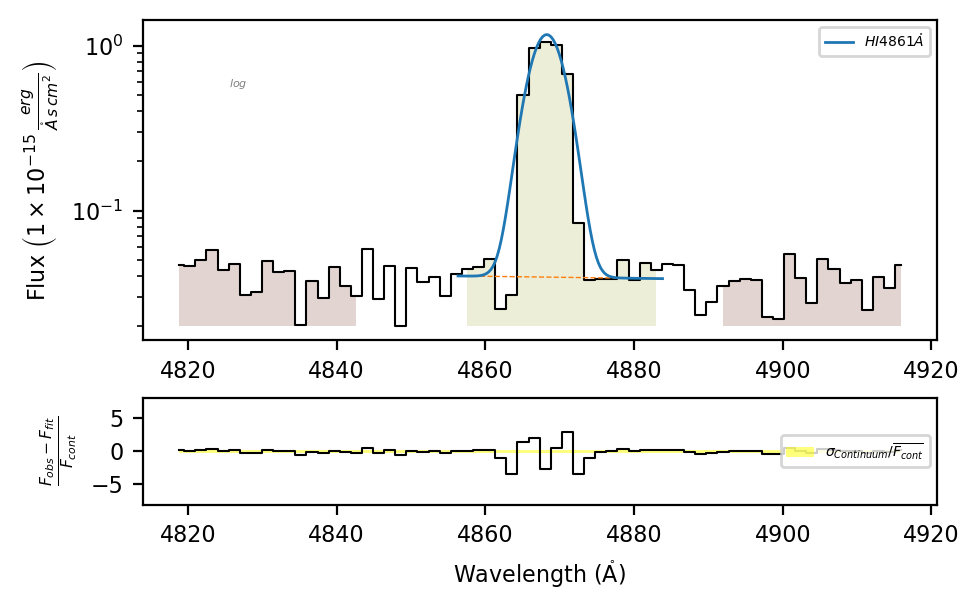

In [28]:
spec8.fit.bands(4861)
spec8.plot.bands()

In [29]:
spec8.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13546c830>>

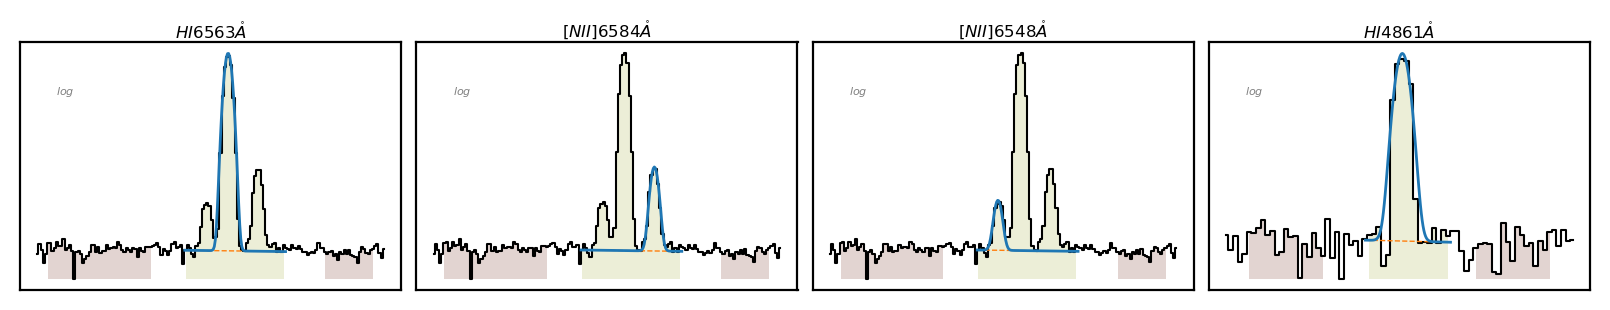

In [30]:
spec8.plot.grid()

In [31]:
spec8.save_frame('slit8_Hae_Hb_f99.txt')

SLIT 12

In [32]:
hdul12 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_1D_f99.fits', mode='update')
header12 = hdul12[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header12['FLUXSCAL'] = 1
header12
hdul12.flush()

In [33]:
print(header12)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2440 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:06' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:06' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4031.98266601562 / RA at R

In [34]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file12 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit12_1D_f99.fits'

#load the data
wave12, flux12, hdr12 = import_1313_fits(fits_file12)

In [35]:
spec12 = lime.Spectrum(wave12, flux12, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

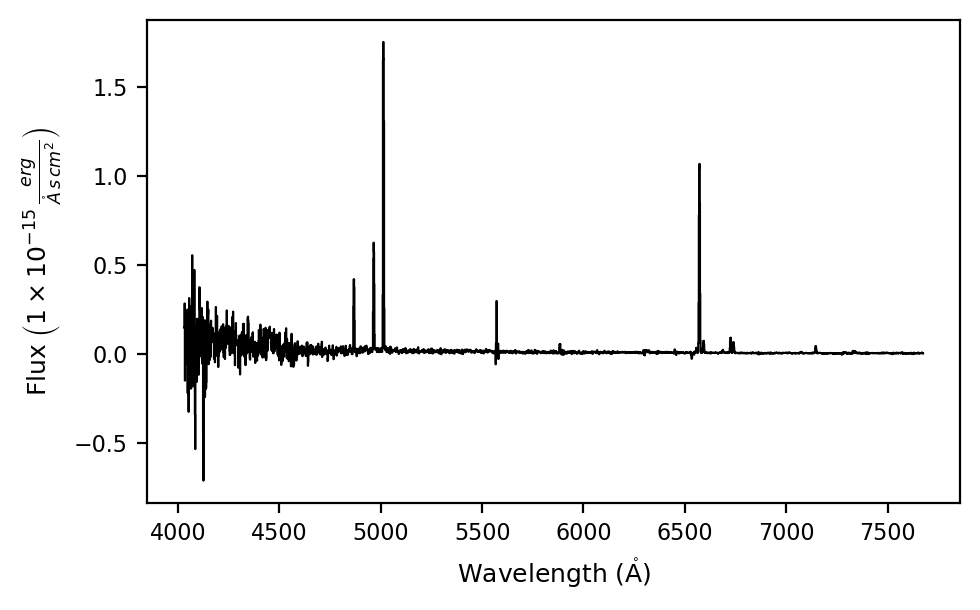

In [36]:
spec12.plot.spectrum(label='NGC1313')

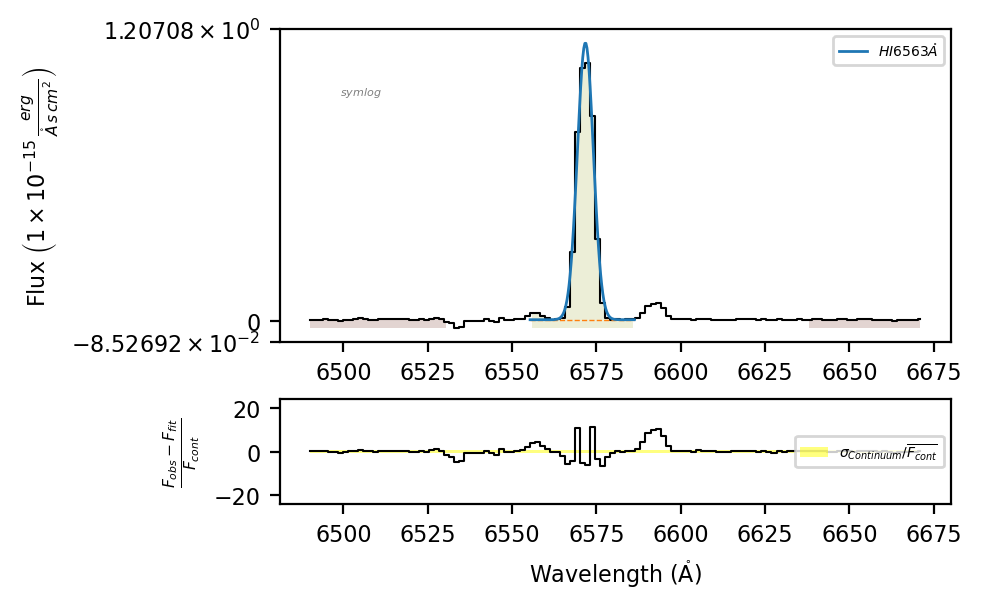

In [37]:
spec12.fit.bands(6563)
spec12.plot.bands()

In [38]:
# Line name and its location mask in the rest _frame
line12 = 'H1_6563A'
band_edges12 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

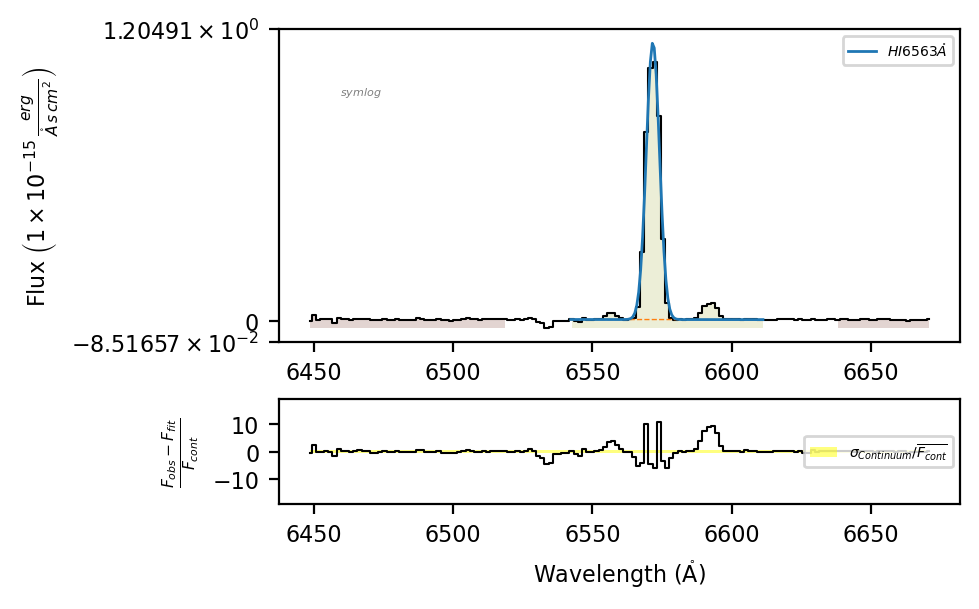

In [39]:
# Run the fitting and plot it
spec12.fit.bands(line12, band_edges12)
spec12.plot.bands()

In [40]:
# Fit configuration
line12 = 'H1_6563A_b'
fit_conf12 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

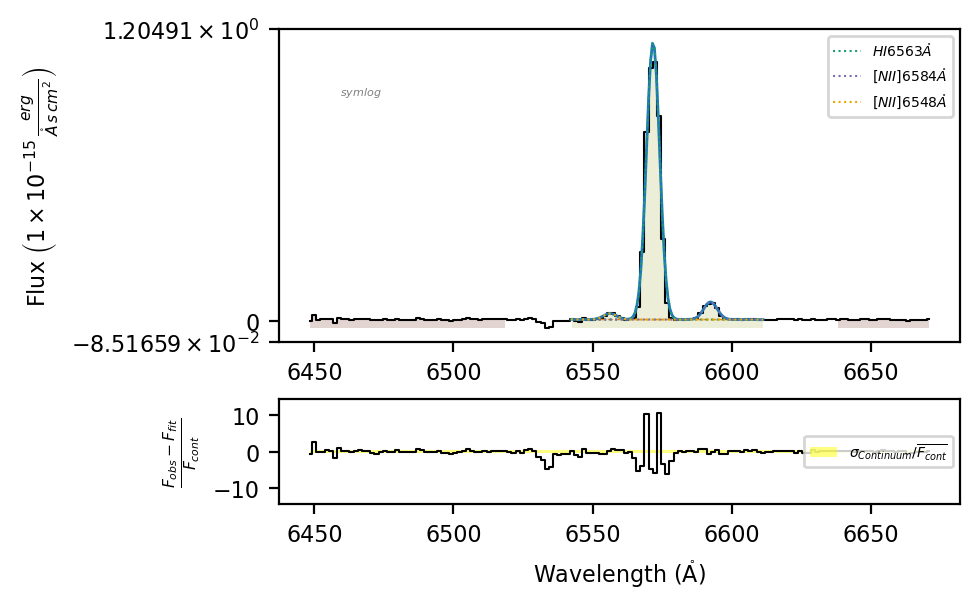

In [41]:
# New attempt including the fit configuration
spec12.fit.bands(line12, band_edges12, fit_conf=fit_conf12)
spec12.plot.bands()

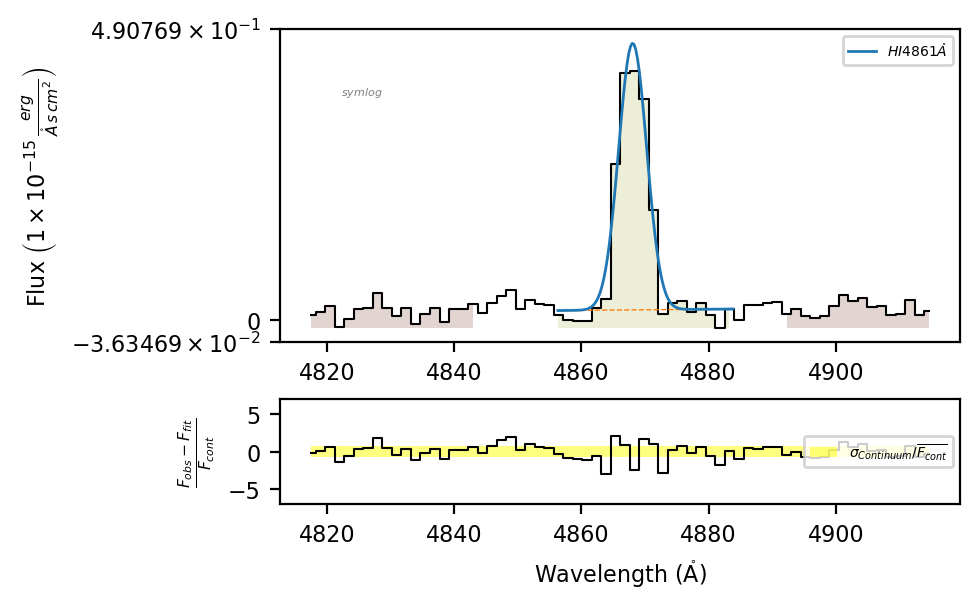

In [42]:
spec12.fit.bands(4861)
spec12.plot.bands()

In [43]:
spec12.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x137382960>>

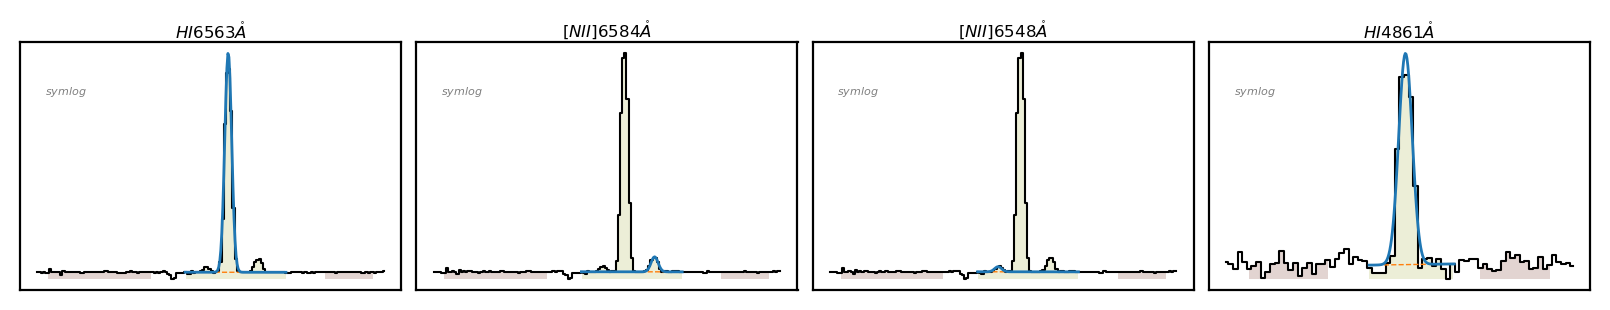

In [44]:
spec12.plot.grid()

In [45]:
spec12.save_frame('slit12_Hae_Hb_f99.txt')

SLIT 14

In [46]:
hdul14 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99.fits', mode='update')
header14 = hdul14[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header14['FLUXSCAL'] = 1
header14
hdul14.flush()

In [47]:
print(header14)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2809 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:12' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:12' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4036.02270507813 / RA at R

In [48]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file14 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_1D_f99.fits'

#load the data
wave14, flux14, hdr14 = import_1313_fits(fits_file14)

In [49]:
spec14 = lime.Spectrum(wave14, flux14, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

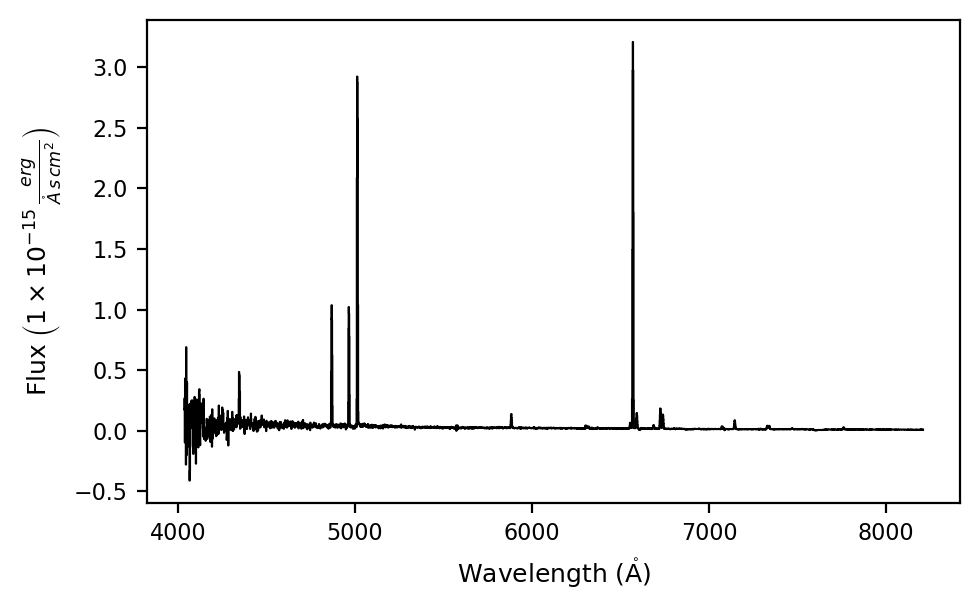

In [50]:
spec14.plot.spectrum(label='NGC1313')

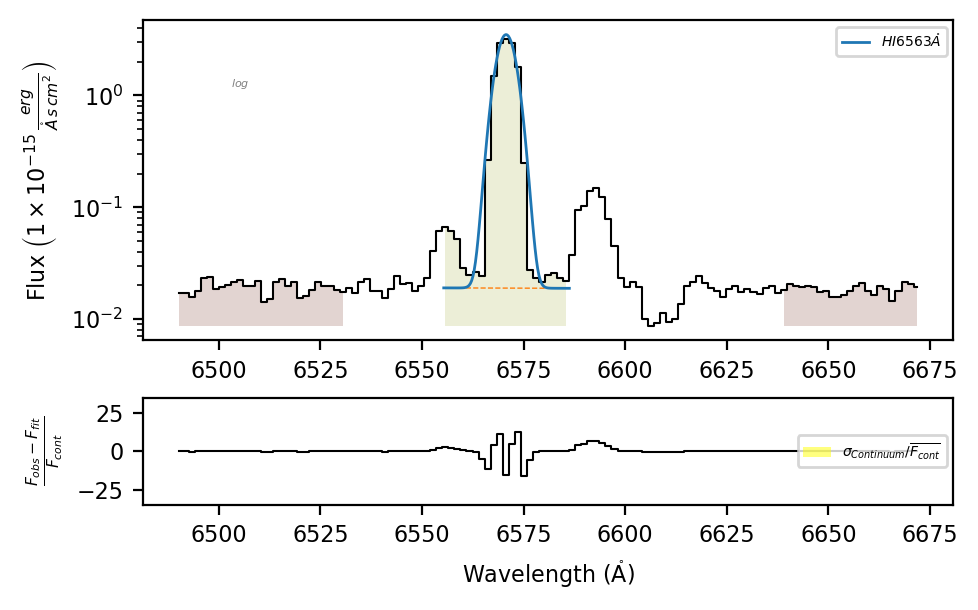

In [51]:
spec14.fit.bands(6563)
spec14.plot.bands()

In [52]:
# Line name and its location mask in the rest _frame
line14 = 'H1_6563A'
band_edges14 = np.array([6438.03, 6508.66, 6532, 6594, 6627.70, 6661.82])

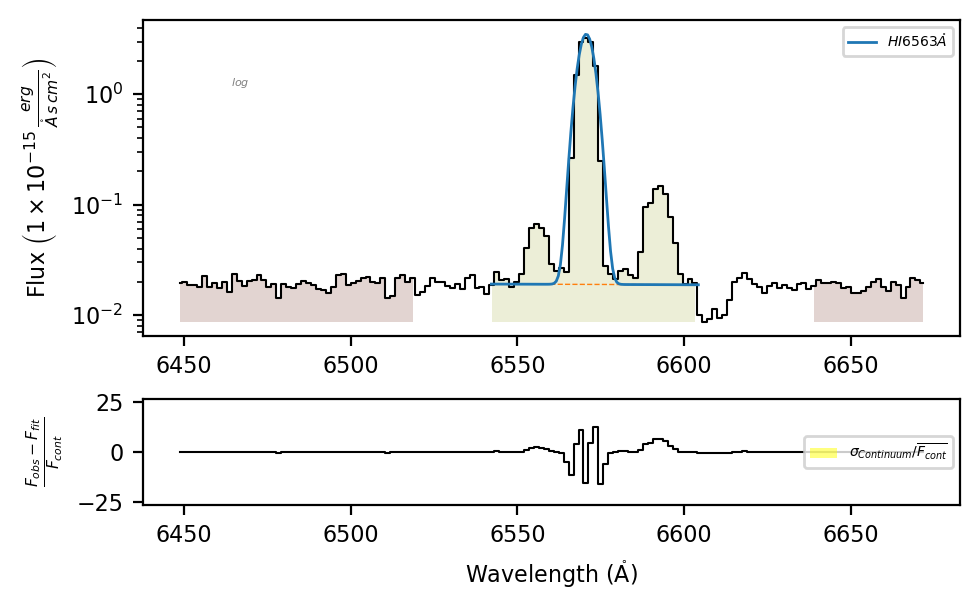

In [53]:
# Run the fitting and plot it
spec14.fit.bands(line14, band_edges14)
spec14.plot.bands()

In [54]:
# Fit configuration
line14 = 'H1_6563A_b'
fit_conf14 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

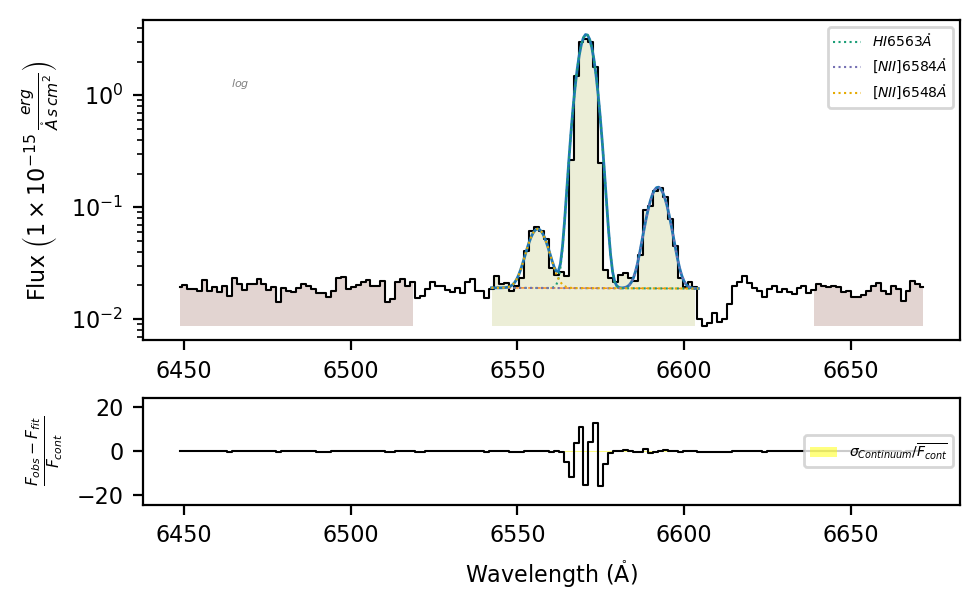

In [55]:
# New attempt including the fit configuration
spec14.fit.bands(line14, band_edges14, fit_conf=fit_conf14)
spec14.plot.bands()

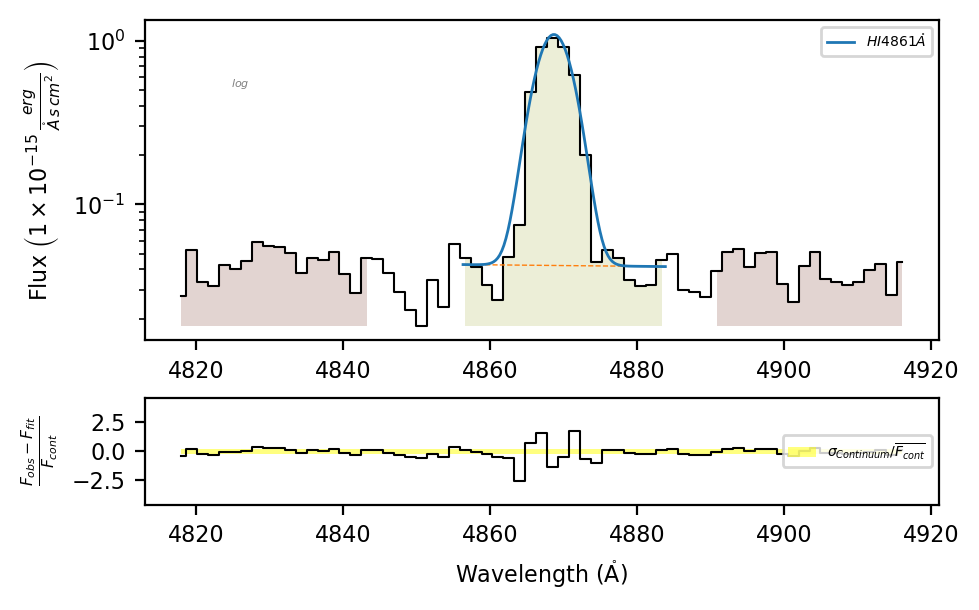

In [56]:
spec14.fit.bands(4861)
spec14.plot.bands()

In [57]:
spec14.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x138fac290>>

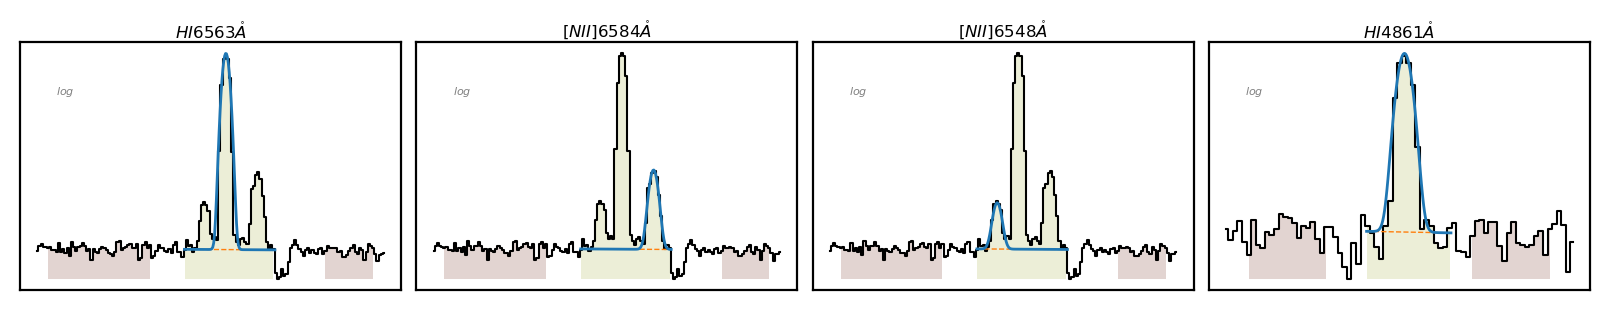

In [58]:
spec14.plot.grid()

In [59]:
spec14.save_frame('slit14_Hae_Hb_f99.txt')

SLIT 16

In [60]:
hdul16 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_1D_f99.fits', mode='update')
header16 = hdul16[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header16['FLUXSCAL'] = 1
header16
hdul16.flush()

In [61]:
print(header16)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2696 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:18' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:18' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4033.59643554687 / RA at R

In [62]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file16 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_1D_f99.fits'

#load the data
wave16, flux16, hdr16 = import_1313_fits(fits_file16)

In [63]:
spec16 = lime.Spectrum(wave16, flux16, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

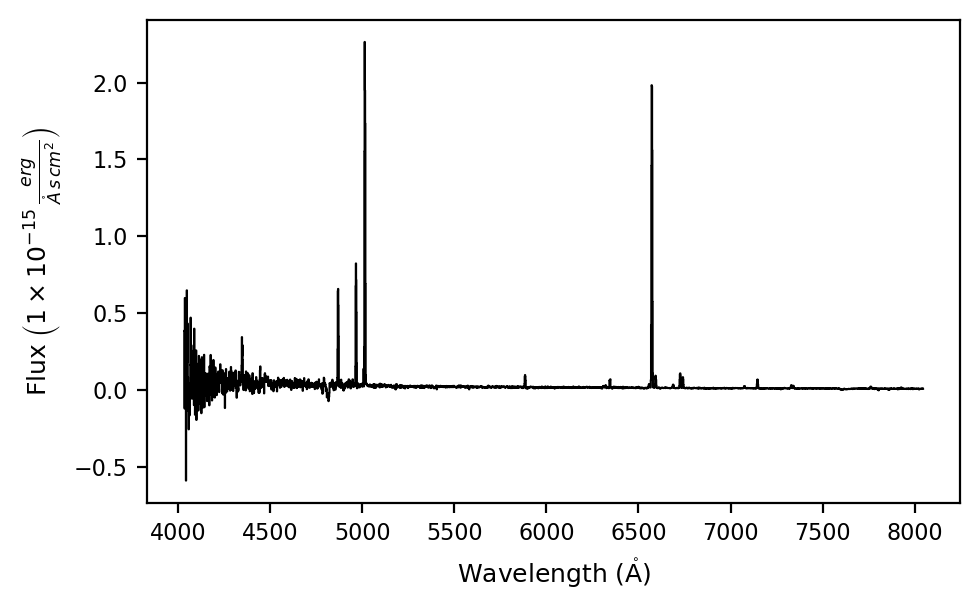

In [64]:
spec16.plot.spectrum(label='NGC1313')

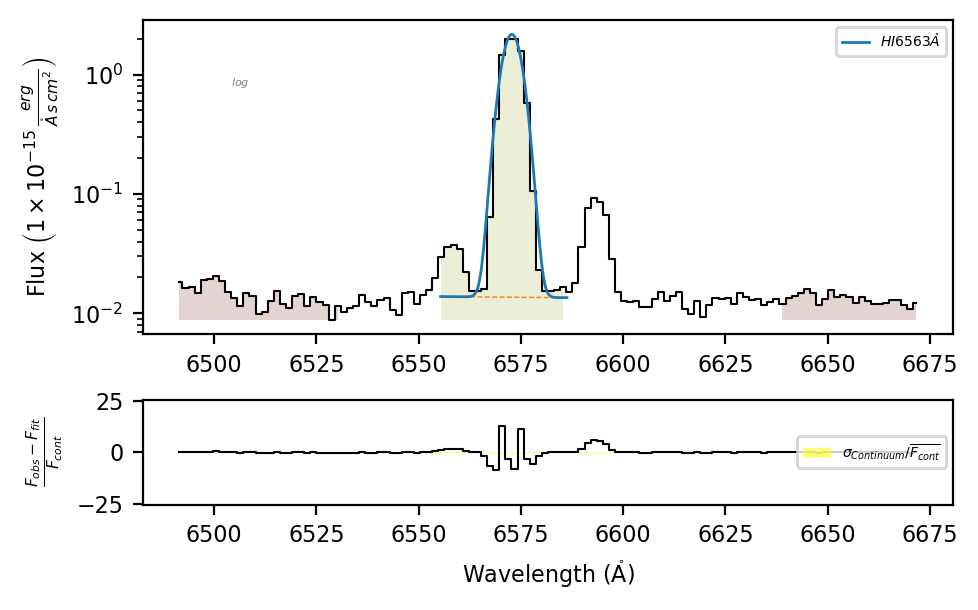

In [65]:
spec16.fit.bands(6563)
spec16.plot.bands()

In [66]:
# Line name and its location mask in the rest _frame
line16 = 'H1_6563A'
band_edges16 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

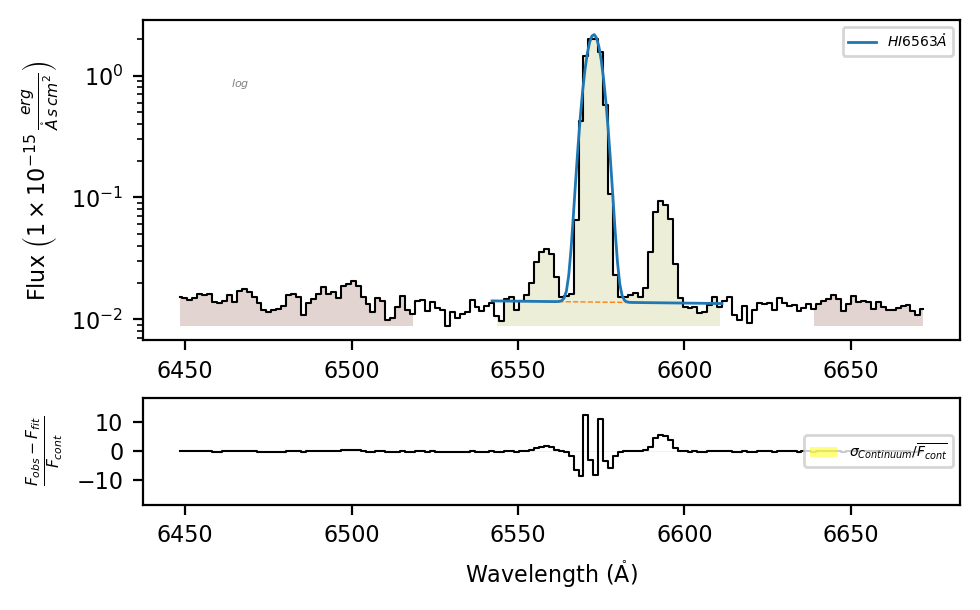

In [67]:
# Run the fitting and plot it
spec16.fit.bands(line16, band_edges16)
spec16.plot.bands()

In [68]:
# Fit configuration
line16 = 'H1_6563A_b'
fit_conf16 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

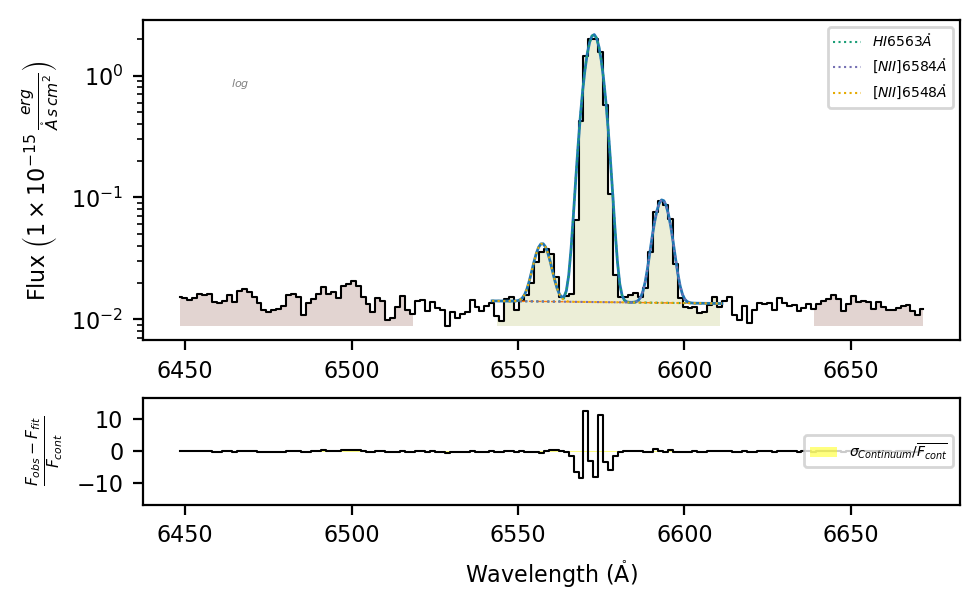

In [69]:
# New attempt including the fit configuration
spec16.fit.bands(line16, band_edges16, fit_conf=fit_conf16)
spec16.plot.bands()

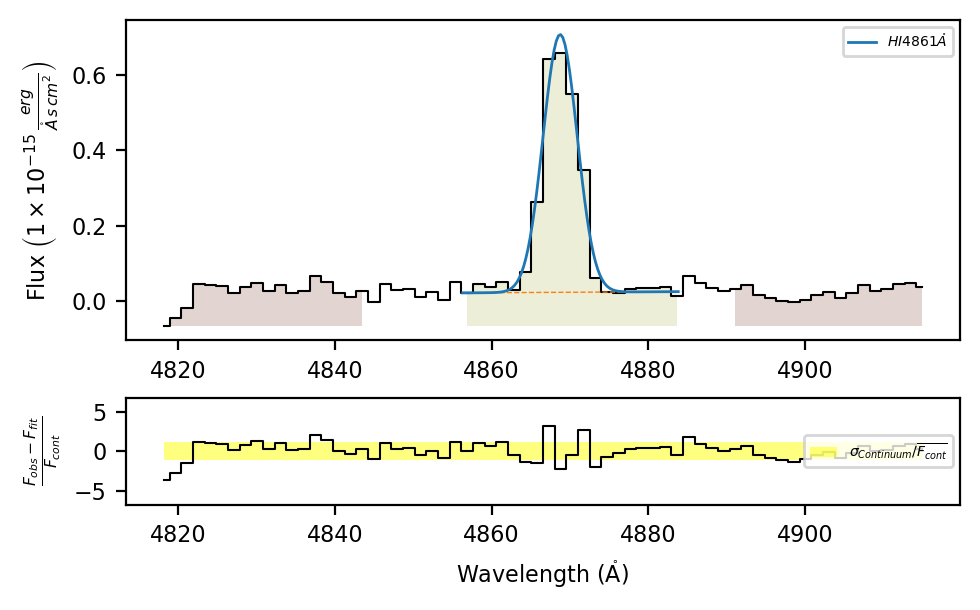

In [70]:
spec16.fit.bands(4861)
spec16.plot.bands()

In [71]:
spec16.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13817a960>>

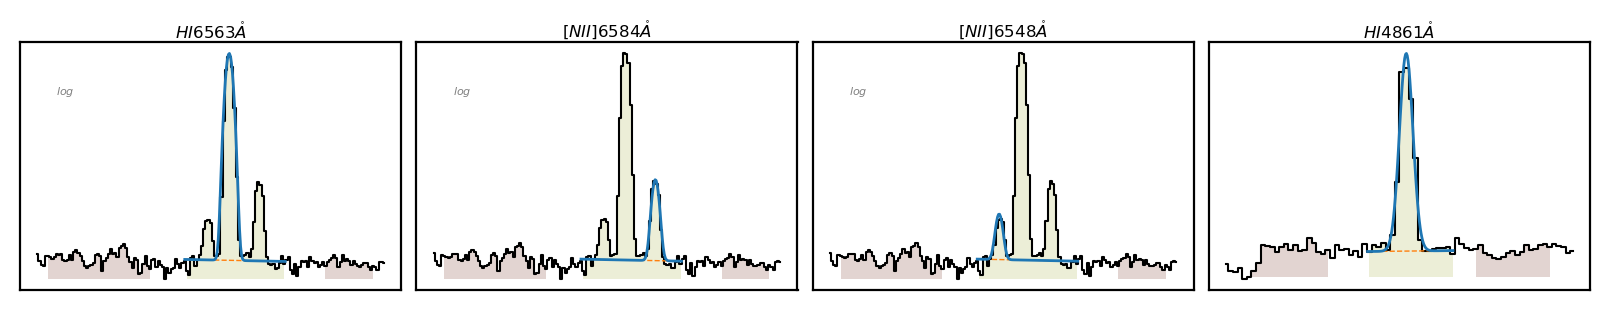

In [72]:
spec16.plot.grid()

In [73]:
spec16.save_frame('slit16_Hae_Hb_f99.txt')

SLIT 21

In [74]:
hdul21 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21_1D_f99.fits', mode='update')
header21 = hdul21[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header21['FLUXSCAL'] = 1
header21
hdul21.flush()

In [75]:
print(header21)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2829 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:41' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:41' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =      4036.4033203125 / RA at R

In [76]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file21 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit21_1D_f99.fits'

#load the data
wave21, flux21, hdr21 = import_1313_fits(fits_file21)

In [77]:
spec21 = lime.Spectrum(wave21, flux21, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

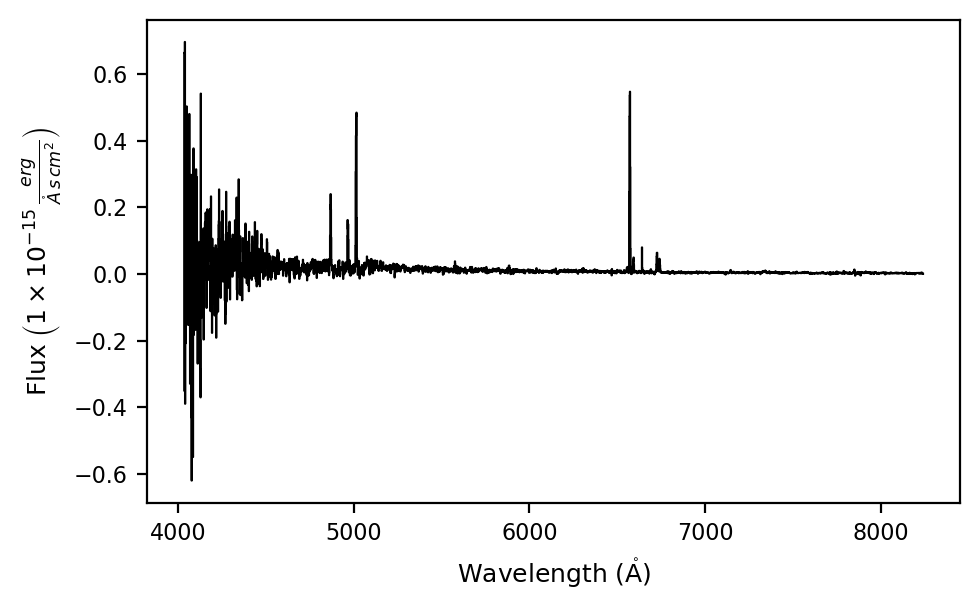

In [78]:
spec21.plot.spectrum(label='NGC1313')

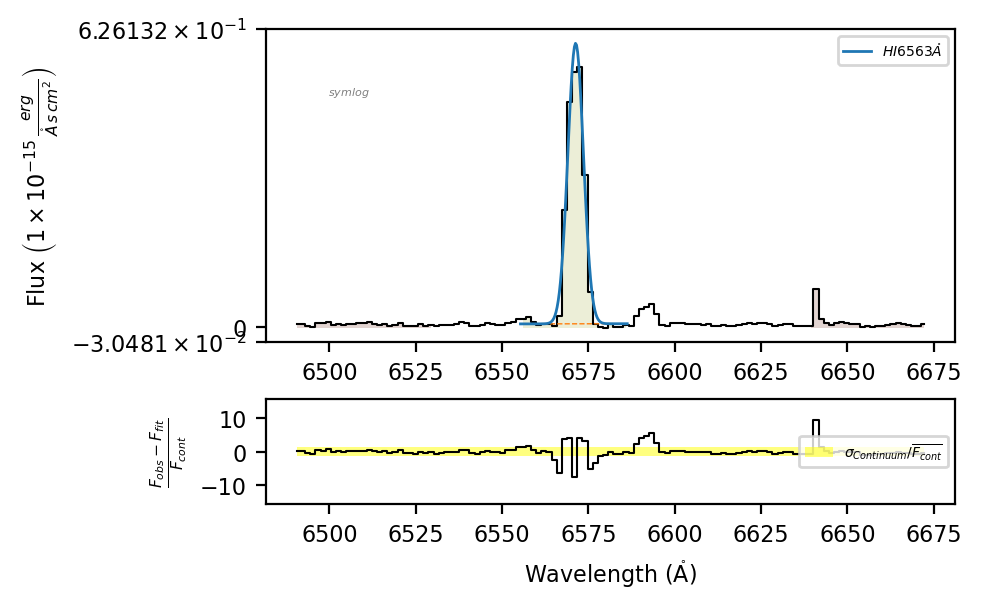

In [79]:
spec21.fit.bands(6563)
spec21.plot.bands()

In [80]:
# Line name and its location mask in the rest _frame
line21 = 'H1_6563A'
band_edges21 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

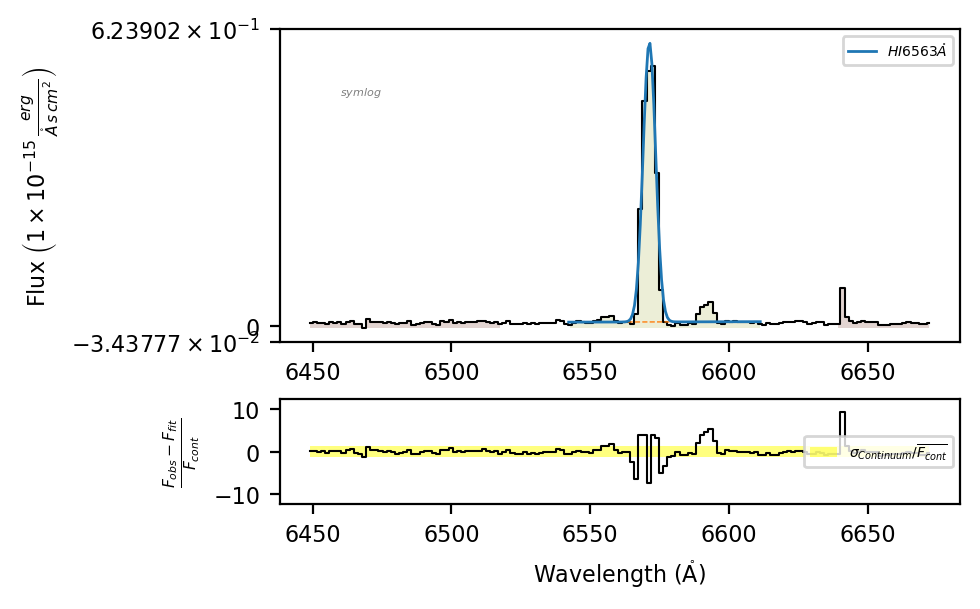

In [81]:
# Run the fitting and plot it
spec21.fit.bands(line21, band_edges21)
spec21.plot.bands()

In [82]:
# Fit configuration
line21 = 'H1_6563A_b'
fit_conf21 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

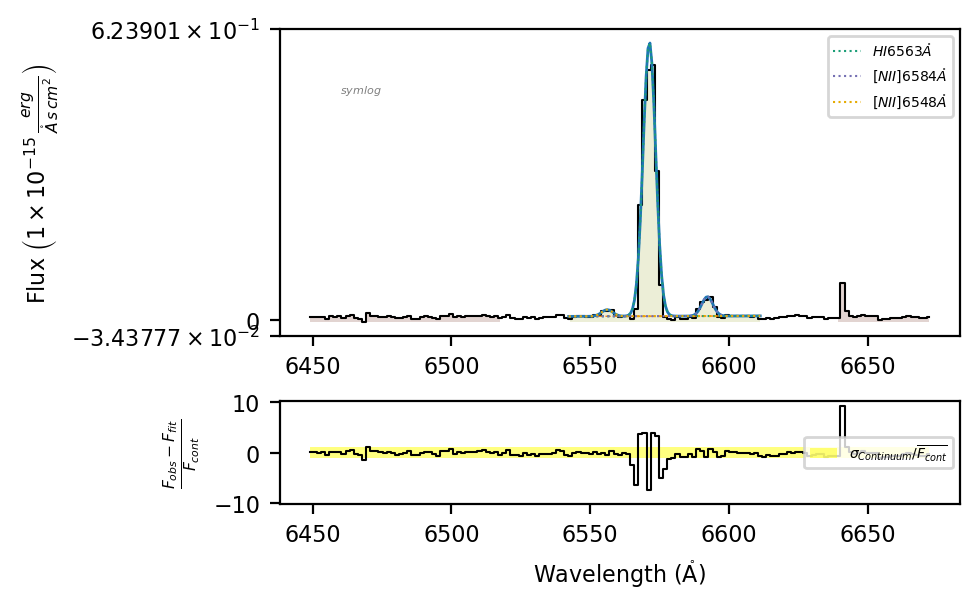

In [83]:
# New attempt including the fit configuration
spec21.fit.bands(line21, band_edges21, fit_conf=fit_conf21)
spec21.plot.bands()

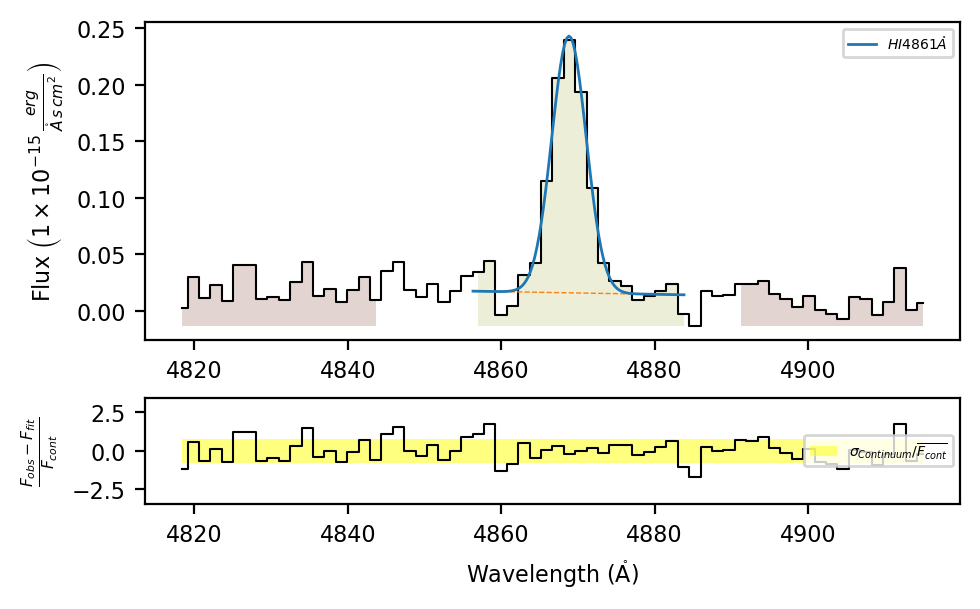

In [84]:
spec21.fit.bands(4861)
spec21.plot.bands()

In [85]:
spec21.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x138dc2900>>

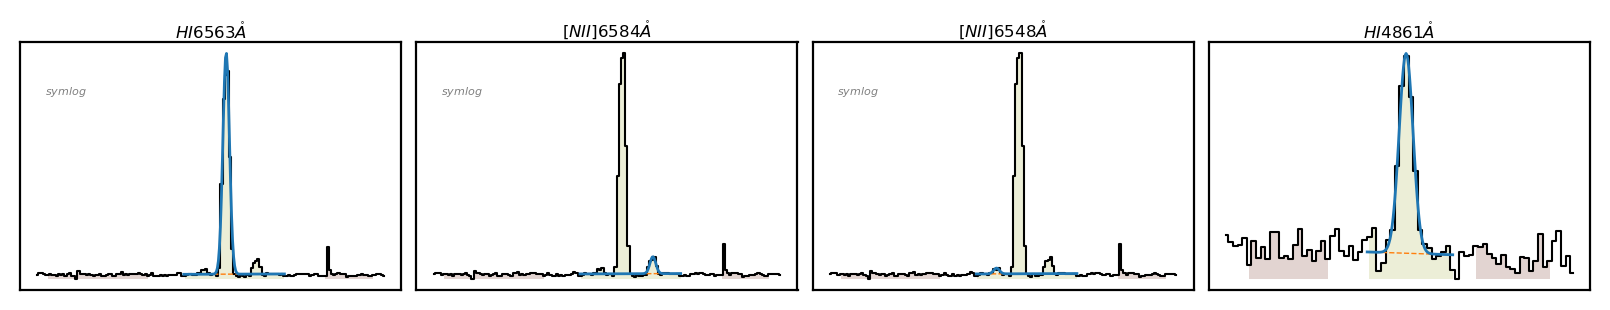

In [86]:
spec21.plot.grid()

In [87]:
spec21.save_frame('slit21_mask2_Hae_Hb_f99.txt')

SLIT 23

In [88]:
hdul23 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23_1D_f99.fits', mode='update')
header23 = hdul23[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header23['FLUXSCAL'] = 1
header23
hdul23.flush()

In [89]:
print(header23)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 3184 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:35:50' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:35:50' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4040.19873046875 / RA at R

In [90]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file23 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit23_1D_f99.fits'

#load the data
wave23, flux23, hdr23 = import_1313_fits(fits_file23)

In [91]:
spec23 = lime.Spectrum(wave23, flux23, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

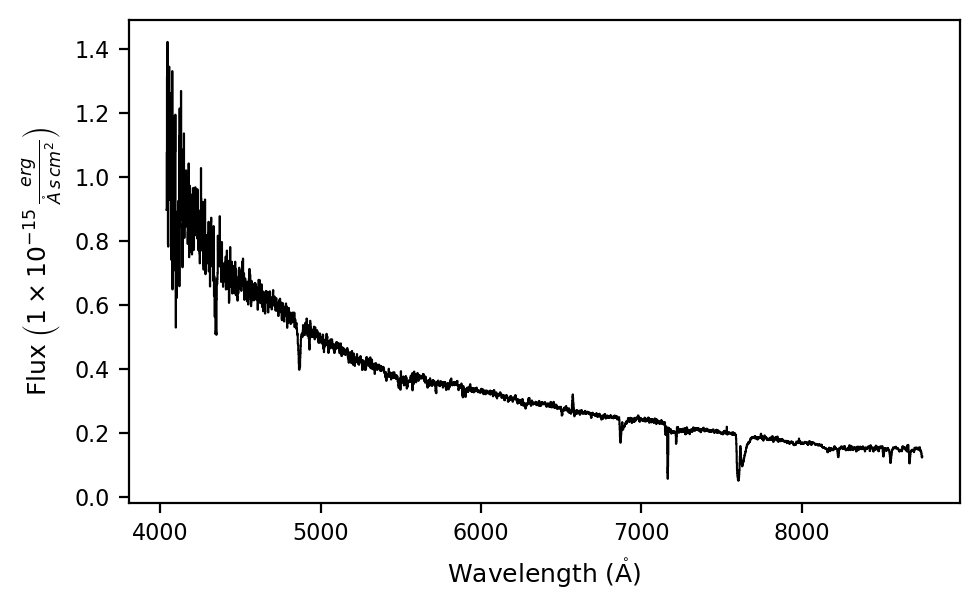

In [92]:
spec23.plot.spectrum(label='NGC1313')

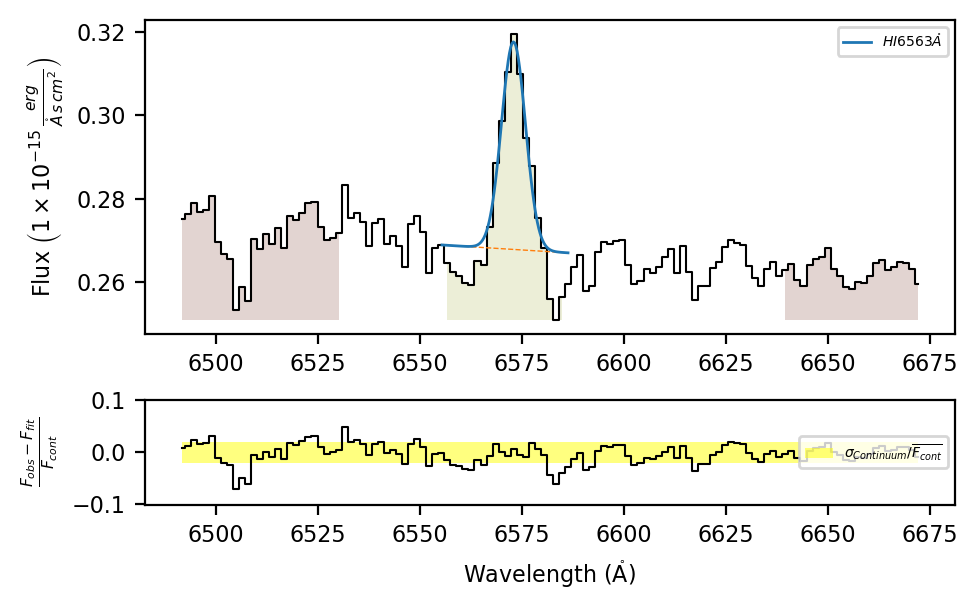

In [93]:
spec23.fit.bands(6563)
spec23.plot.bands()

LiMe WARNING: Line H1_4861A introduced as an emission but the line peak is below the continuum level
LiMe WARNING: Line H1_4861A introduced as an absorption but the line peak is below the continuum level


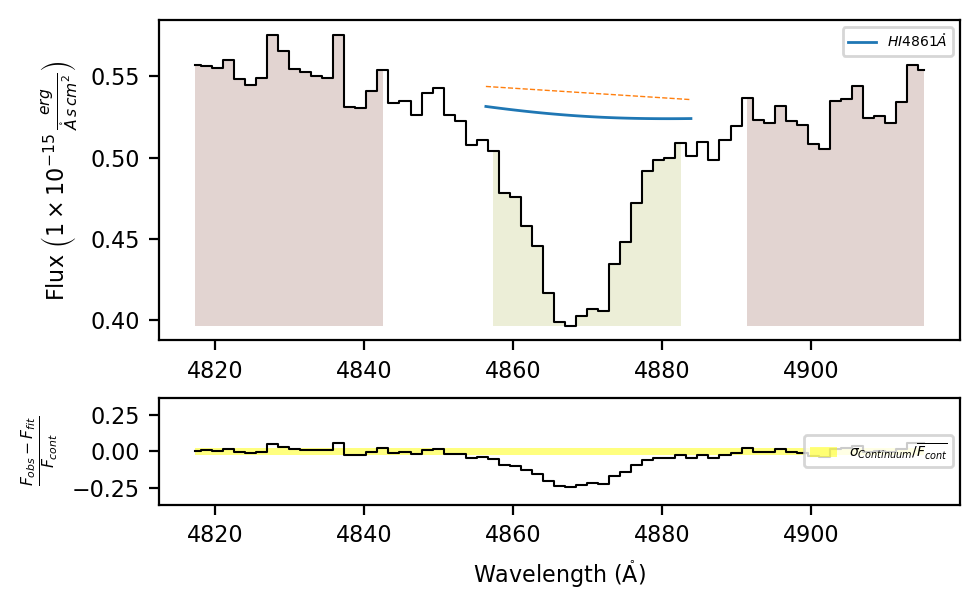

In [94]:
spec23.fit.bands(4861)
spec23.plot.bands()

In [95]:
#pendiente terminar slit 23 pke es absorción ,,, cómo des-enrojecer sin razón Ha/Hb ? o cuando tengo Ha emisión y Hb absorción?

SLIT 25

In [96]:
hdul25 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25_1D_f99.fits', mode='update')
header25 = hdul25[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header25['FLUXSCAL'] = 1
header25
hdul25.flush()

In [97]:
print(header25)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2590 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:36:02' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:36:02' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4030.51049804688 / RA at R

In [98]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file25 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit25_1D_f99.fits'

#load the data
wave25, flux25, hdr25 = import_1313_fits(fits_file25)

In [99]:
spec25 = lime.Spectrum(wave25, flux25, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

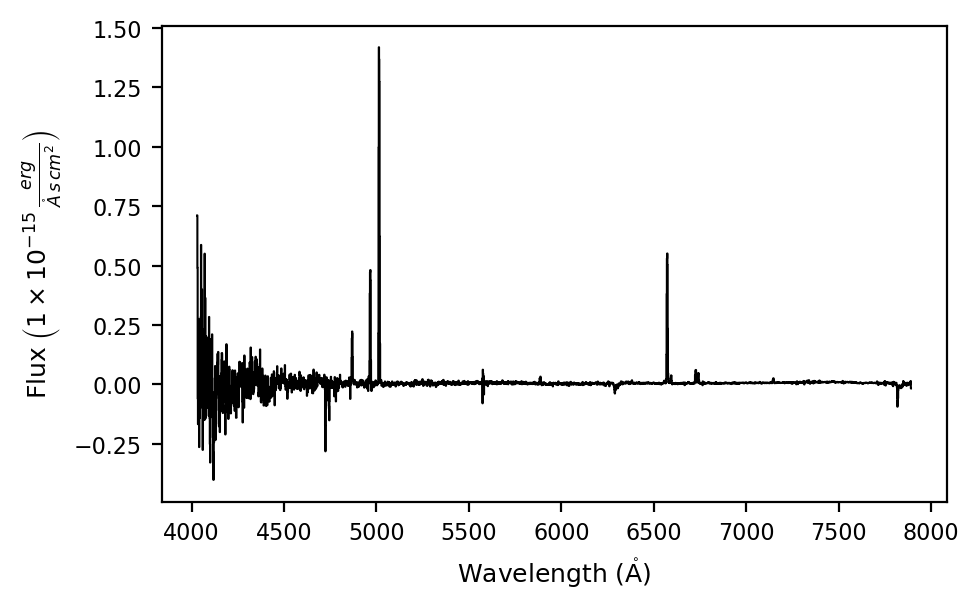

In [100]:
spec25.plot.spectrum(label='NGC1313')

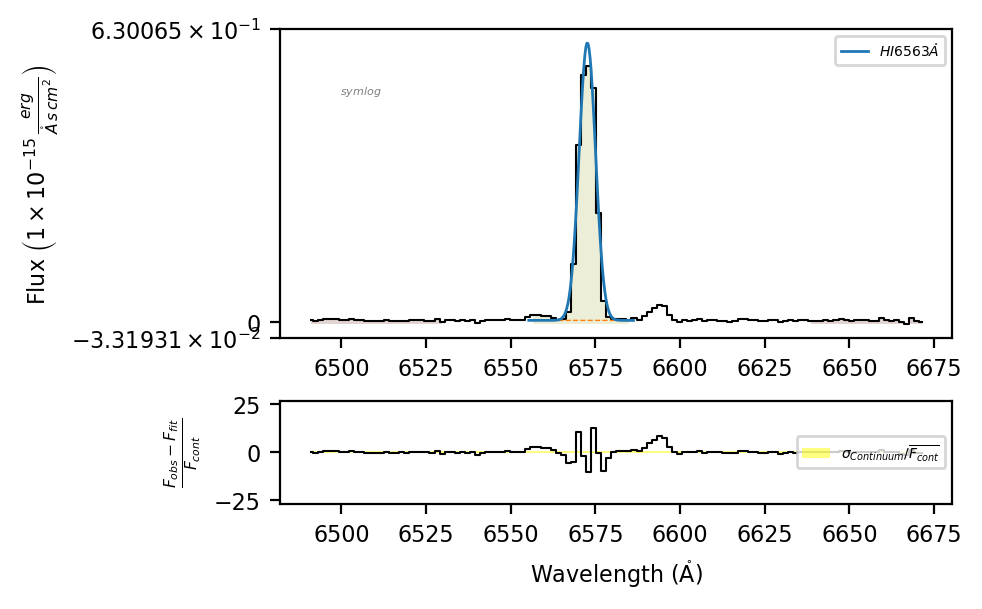

In [101]:
spec25.fit.bands(6563)
spec25.plot.bands()

In [102]:
# Line name and its location mask in the rest _frame
line25 = 'H1_6563A'
band_edges25 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

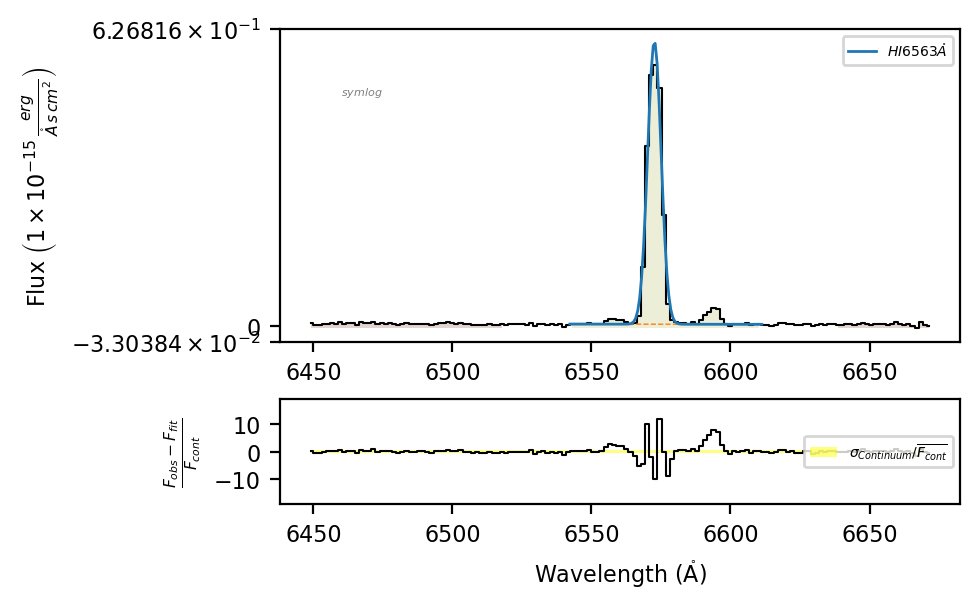

In [103]:
# Run the fitting and plot it
spec25.fit.bands(line25, band_edges25)
spec25.plot.bands()

In [104]:
# Fit configuration
line25 = 'H1_6563A_b'
fit_conf25 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

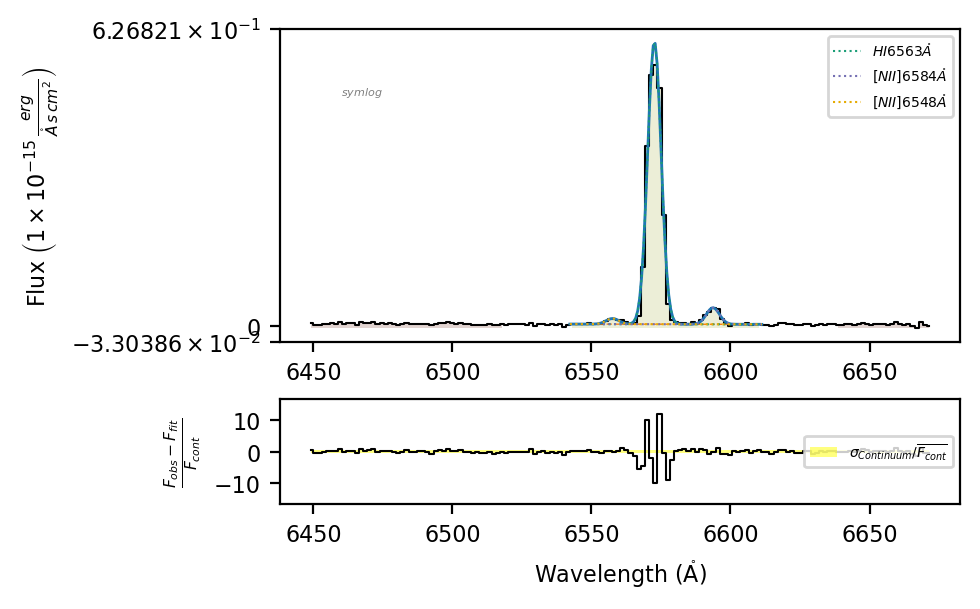

In [105]:
# New attempt including the fit configuration
spec25.fit.bands(line25, band_edges25, fit_conf=fit_conf25)
spec25.plot.bands()

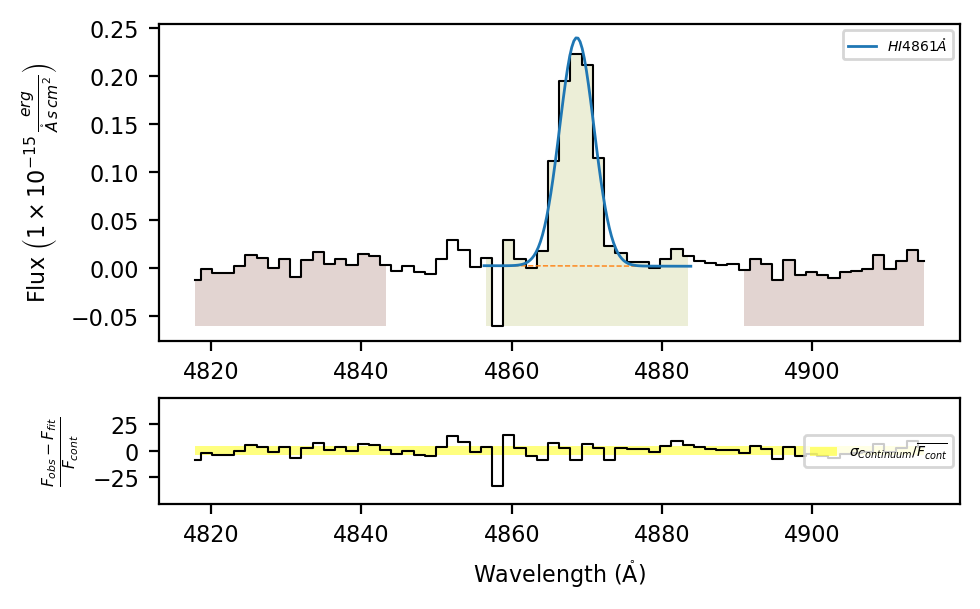

In [106]:
spec25.fit.bands(4861)
spec25.plot.bands()

In [109]:
# Line name and its location mask in the rest _frame
line25_Hb = 'H1_4861A'
#band_edges = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4908.40])
band_edges25_Hb = np.array([4809.80, 4836.10, 4851, 4876.181741, 4883.13, 4908.40])

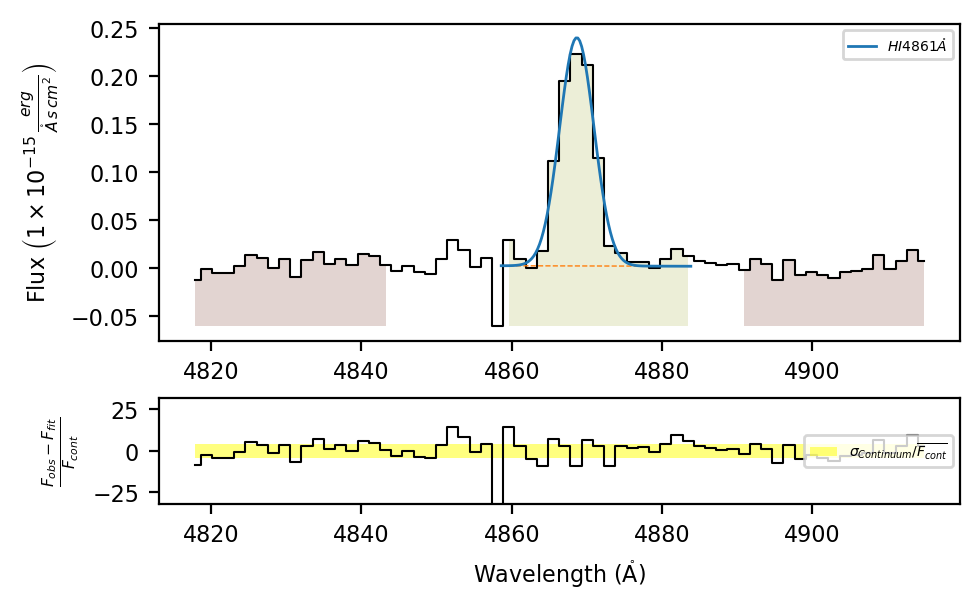

In [110]:
# Run the fitting and plot it
spec25.fit.bands(line25_Hb, band_edges25_Hb)
spec25.plot.bands()

In [111]:
spec25.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x13dd02960>>

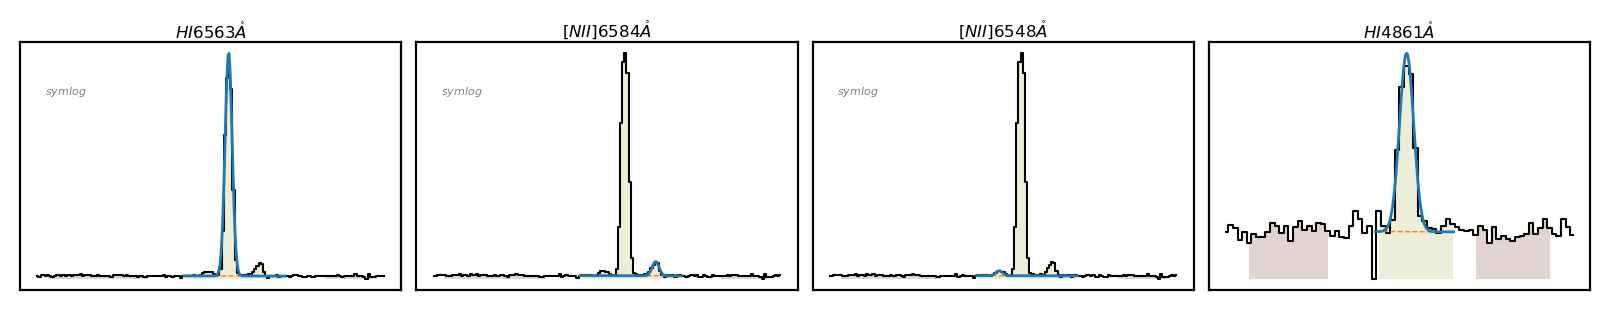

In [112]:
spec25.plot.grid()

In [113]:
spec25.save_frame('slit25_Hae_Hbe_f99.txt')

SLIT 27

In [114]:
hdul27 = fits.open('../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_1D_f99.fits', mode='update')
header27 = hdul27[0].header
#header['BUNIT'] = '1e-15 erg / (Angstrom s cm2)'
header27['FLUXSCAL'] = 1
header27
hdul27.flush()

In [115]:
print(header27)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    1 / Number of axes                                 NAXIS1  =                 2699 / Axis length                                    EXTEND  =                    F / File may contain extensions                    ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        OBJECT  = 'NGC1313-FIELD2 MASK02_median_avsig' / Name of the object observed    DATE    = '2024-10-30T12:36:09' / Date FITS file was generated                  IRAF-TLM= '2024-10-30T12:36:09' / Time of last modification                     FIXPIX  = 'Sep 24 17:25 Bad pixel file is tmpbpm899t.pl'                        CTYPE1  = 'LINEAR  '           / R.A. in tangent plane projection               CRPIX1  =                   1. / Ref pix of axis 1                              CRVAL1  =     4032.66870117188 / RA at R

In [116]:
#now we specify the location and load the data
#address of NGC1313 spectrum (in this case, here)
fits_file27 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_1D_f99.fits'

#load the data
wave27, flux27, hdr27 = import_1313_fits(fits_file27)

In [129]:
spec27 = lime.Spectrum(wave27, flux27, redshift=z_obj, norm_flux=normFlux, units_flux='1e-15 * FLAM')

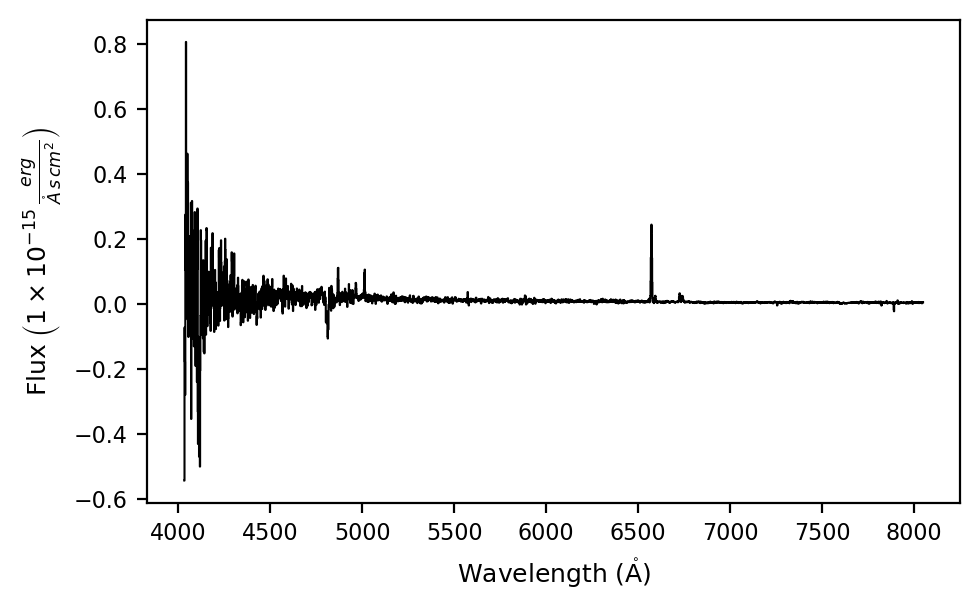

In [130]:
spec27.plot.spectrum(label='NGC1313')

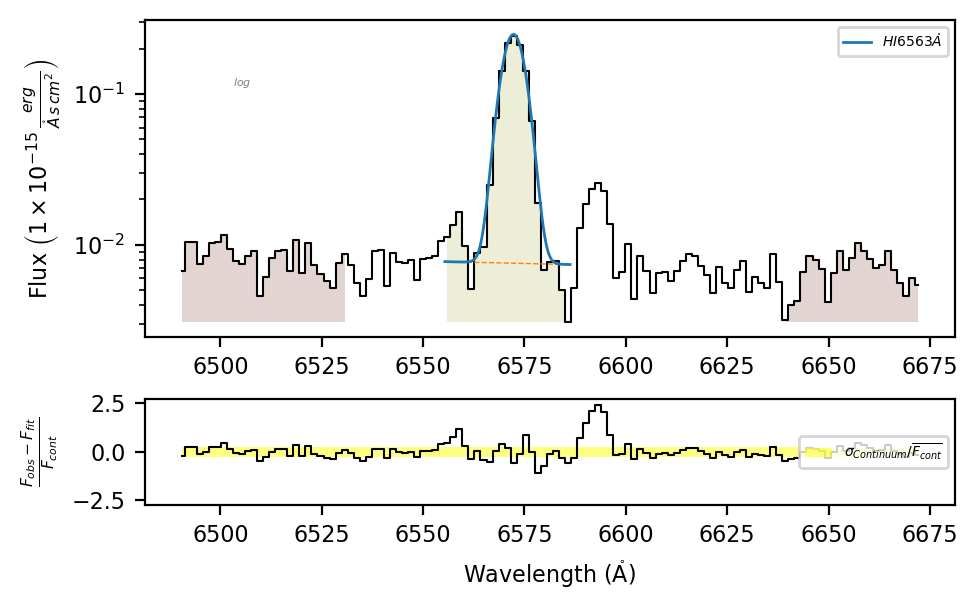

In [131]:
spec27.fit.bands(6563)
spec27.plot.bands()

In [132]:
# Line name and its location mask in the rest _frame
line27 = 'H1_6563A'
band_edges27 = np.array([6438.03, 6508.66, 6532, 6600.95, 6627.70, 6661.82])

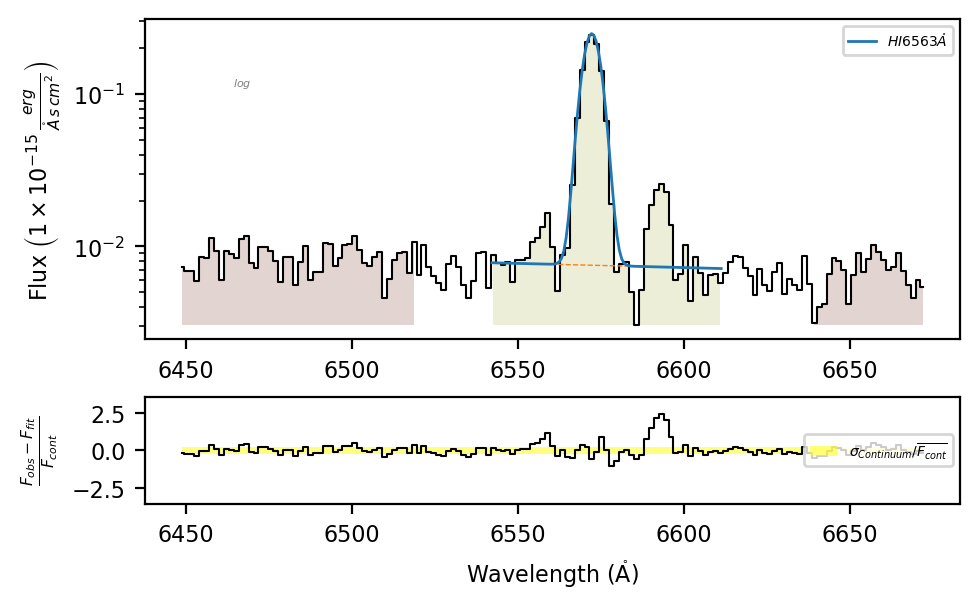

In [133]:
# Run the fitting and plot it
spec27.fit.bands(line27, band_edges27)
spec27.plot.bands()

In [134]:
# Fit configuration
line27 = 'H1_6563A_b'
fit_conf27 = {'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
            'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
            'N2_6548A_kinem': 'N2_6584A'}

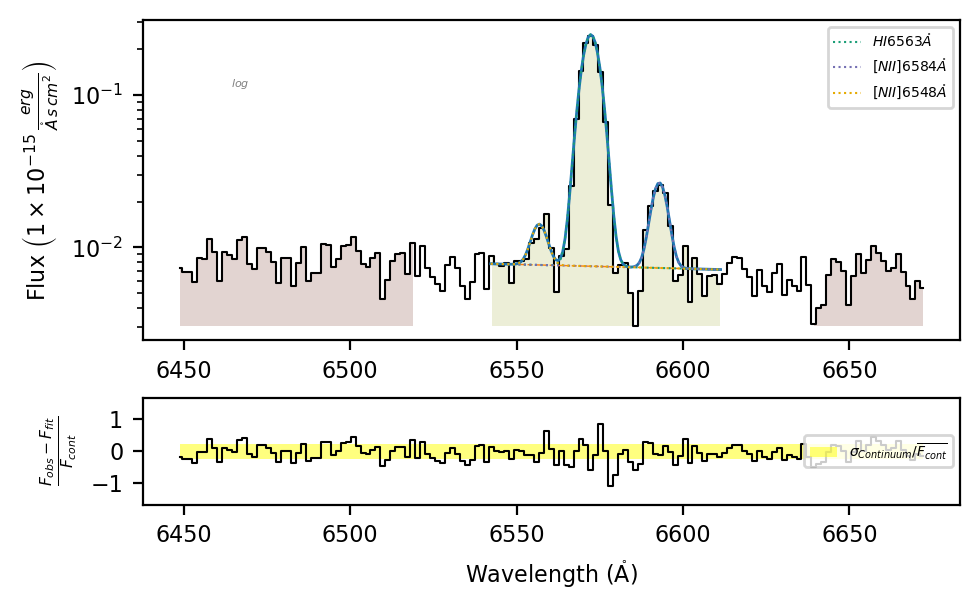

In [135]:
# New attempt including the fit configuration
spec27.fit.bands(line27, band_edges27, fit_conf=fit_conf27)
spec27.plot.bands()

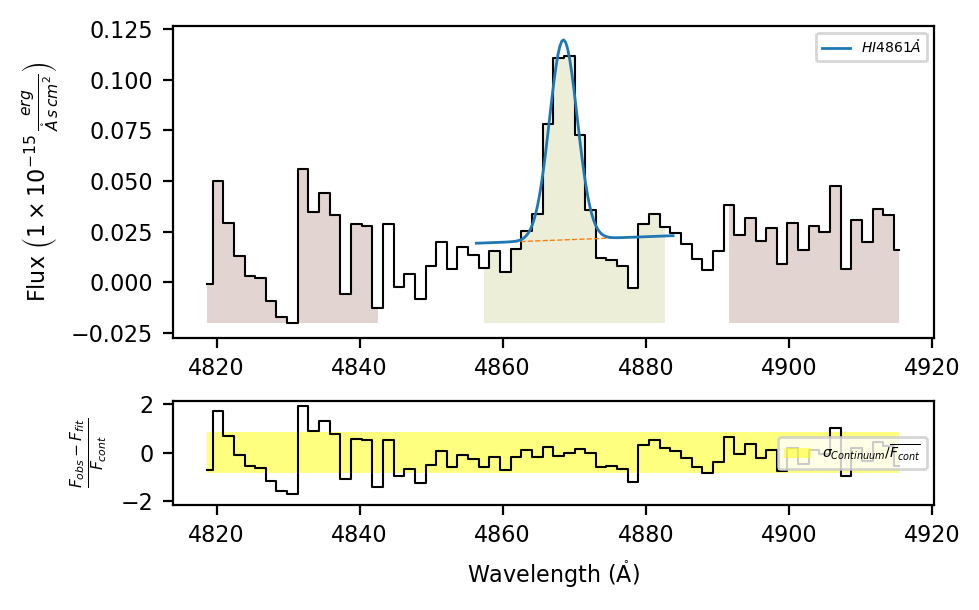

In [136]:
spec27.fit.bands(4861)
spec27.plot.bands()

In [155]:
# Line name and its location mask in the rest _frame
line27_Hb = 'H1_4861A'
#band_edges = np.array([4809.80, 4836.10, 4848.715437, 4876.181741, 4883.13, 4908.40])
band_edges27_Hb = np.array([4809.80, 4836.10, 4848.715437, 4870.5, 4883.13, 4908.40])

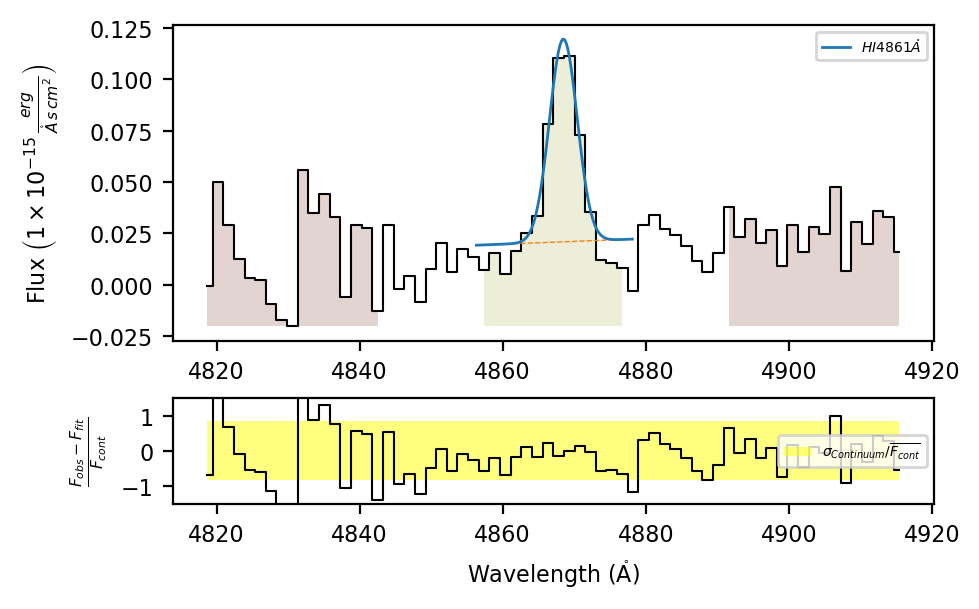

In [156]:
# Run the fitting and plot it
spec27.fit.bands(line27_Hb, band_edges27_Hb)
spec27.plot.bands()

In [157]:
spec27.fit.frame

<bound method SpecTreatment.frame of <lime.workflow.SpecTreatment object at 0x139b24e60>>

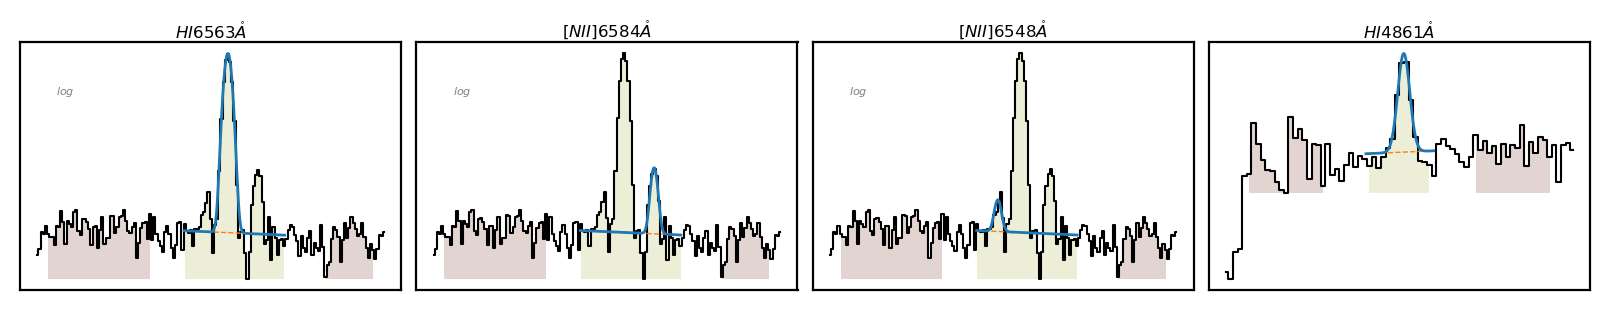

In [158]:
spec27.plot.grid()

In [159]:
spec27.save_frame('slit27_Hae_Hbe_f99.txt')